In [1]:
# ============================================
# WORKOUT EXERCISE TYPE RECOMMENDATION
# Multi-class Classification Project
# ============================================
# # 1. Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully! ✅")

Libraries imported successfully! ✅


In [2]:
# Load the dataset
df = pd.read_csv('data/gym_members_exercise_tracking.csv')

print("="*60)
print("DATASET LOADED SUCCESSFULLY! ✅")
print("="*60)
print(f"\nShape: {df.shape}")
print(f"Total Records: {df.shape[0]:,}")
print(f"Total Features: {df.shape[1]}")

DATASET LOADED SUCCESSFULLY! ✅

Shape: (973, 15)
Total Records: 973
Total Features: 15


In [3]:
# # 2. Initial Data Inspection

# %%
print("\n" + "="*60)
print("FIRST 5 ROWS")
print("="*60)
display(df.head())

print("\n" + "="*60)
print("LAST 5 ROWS")
print("="*60)
display(df.tail())

# %%
print("\n" + "="*60)
print("DATASET INFO")
print("="*60)
df.info()

# %%
print("\n" + "="*60)
print("COLUMN NAMES")
print("="*60)
print(df.columns.tolist())

# %%
print("\n" + "="*60)
print("BASIC STATISTICS")
print("="*60)
display(df.describe())

# %%
print("\n" + "="*60)
print("DATA TYPES")
print("="*60)
print(df.dtypes)


FIRST 5 ROWS


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39



LAST 5 ROWS


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74
972,46,Male,88.7,1.63,166,146,66,0.75,542.0,Strength,28.8,3.5,2,1,33.38



DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 n

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000



DATA TYPES
Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object


In [4]:
# # 3. Target Variable Analysis

# %%
print("\n" + "="*60)
print("TARGET VARIABLE: Workout_Type")
print("="*60)

print("\nValue Counts:")
print(df['Workout_Type'].value_counts())

print("\nProportions (%):")
print((df['Workout_Type'].value_counts(normalize=True) * 100).round(2))


TARGET VARIABLE: Workout_Type

Value Counts:
Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

Proportions (%):
Workout_Type
Strength    26.52
Cardio      26.21
Yoga        24.56
HIIT        22.71
Name: proportion, dtype: float64


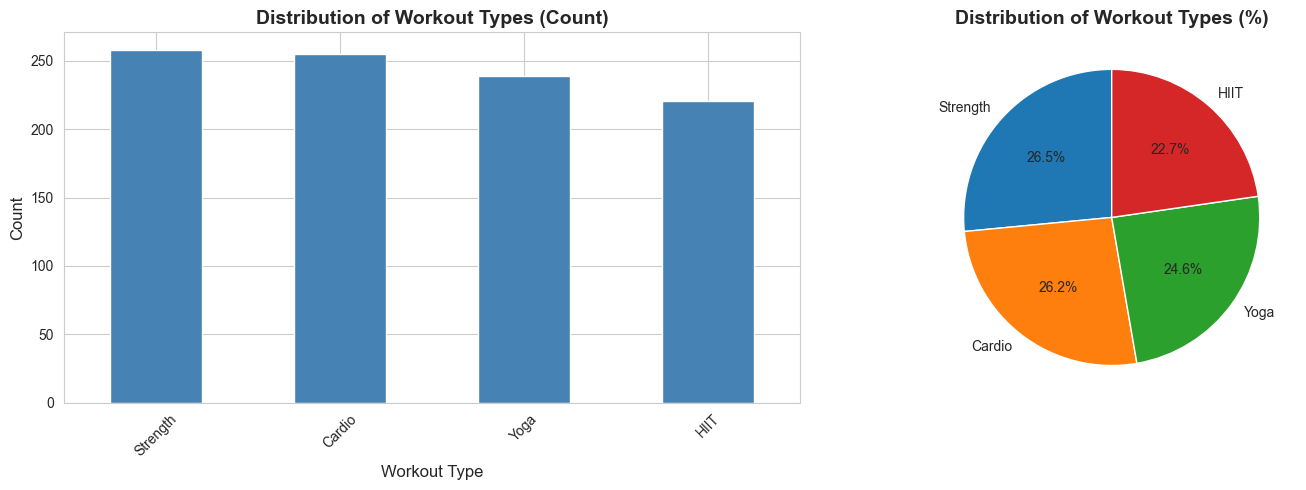


✅ Insight: Check if classes are balanced or imbalanced


In [5]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
df['Workout_Type'].value_counts().plot(kind='bar', color='steelblue', ax=axes[0])
axes[0].set_title('Distribution of Workout Types (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Workout Type', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
df['Workout_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1], startangle=90)
axes[1].set_title('Distribution of Workout Types (%)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print("\n✅ Insight: Check if classes are balanced or imbalanced")

In [6]:
# # 4. Missing Values Analysis

# %%
print("\n" + "="*60)
print("MISSING VALUES CHECK")
print("="*60)

missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
    print("\n⚠️ Action needed: Handle missing values")
else:
    print("✅ NO MISSING VALUES FOUND!")


MISSING VALUES CHECK
✅ NO MISSING VALUES FOUND!


In [7]:
# # 5. Feature Type Identification

# %%
print("\n" + "="*60)
print("FEATURE TYPES")
print("="*60)

# Identify numerical and categorical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove target variable from feature lists
if 'Workout_Type' in numerical_cols:
    numerical_cols.remove('Workout_Type')
if 'Workout_Type' in categorical_cols:
    categorical_cols.remove('Workout_Type')

print(f"\n📊 Numerical Features ({len(numerical_cols)}):")
for i, col in enumerate(numerical_cols, 1):
    print(f"  {i}. {col}")

print(f"\n📝 Categorical Features ({len(categorical_cols)}):")
for i, col in enumerate(categorical_cols, 1):
    print(f"  {i}. {col}")


FEATURE TYPES

📊 Numerical Features (13):
  1. Age
  2. Weight (kg)
  3. Height (m)
  4. Max_BPM
  5. Avg_BPM
  6. Resting_BPM
  7. Session_Duration (hours)
  8. Calories_Burned
  9. Fat_Percentage
  10. Water_Intake (liters)
  11. Workout_Frequency (days/week)
  12. Experience_Level
  13. BMI

📝 Categorical Features (1):
  1. Gender



NUMERICAL FEATURES DISTRIBUTION


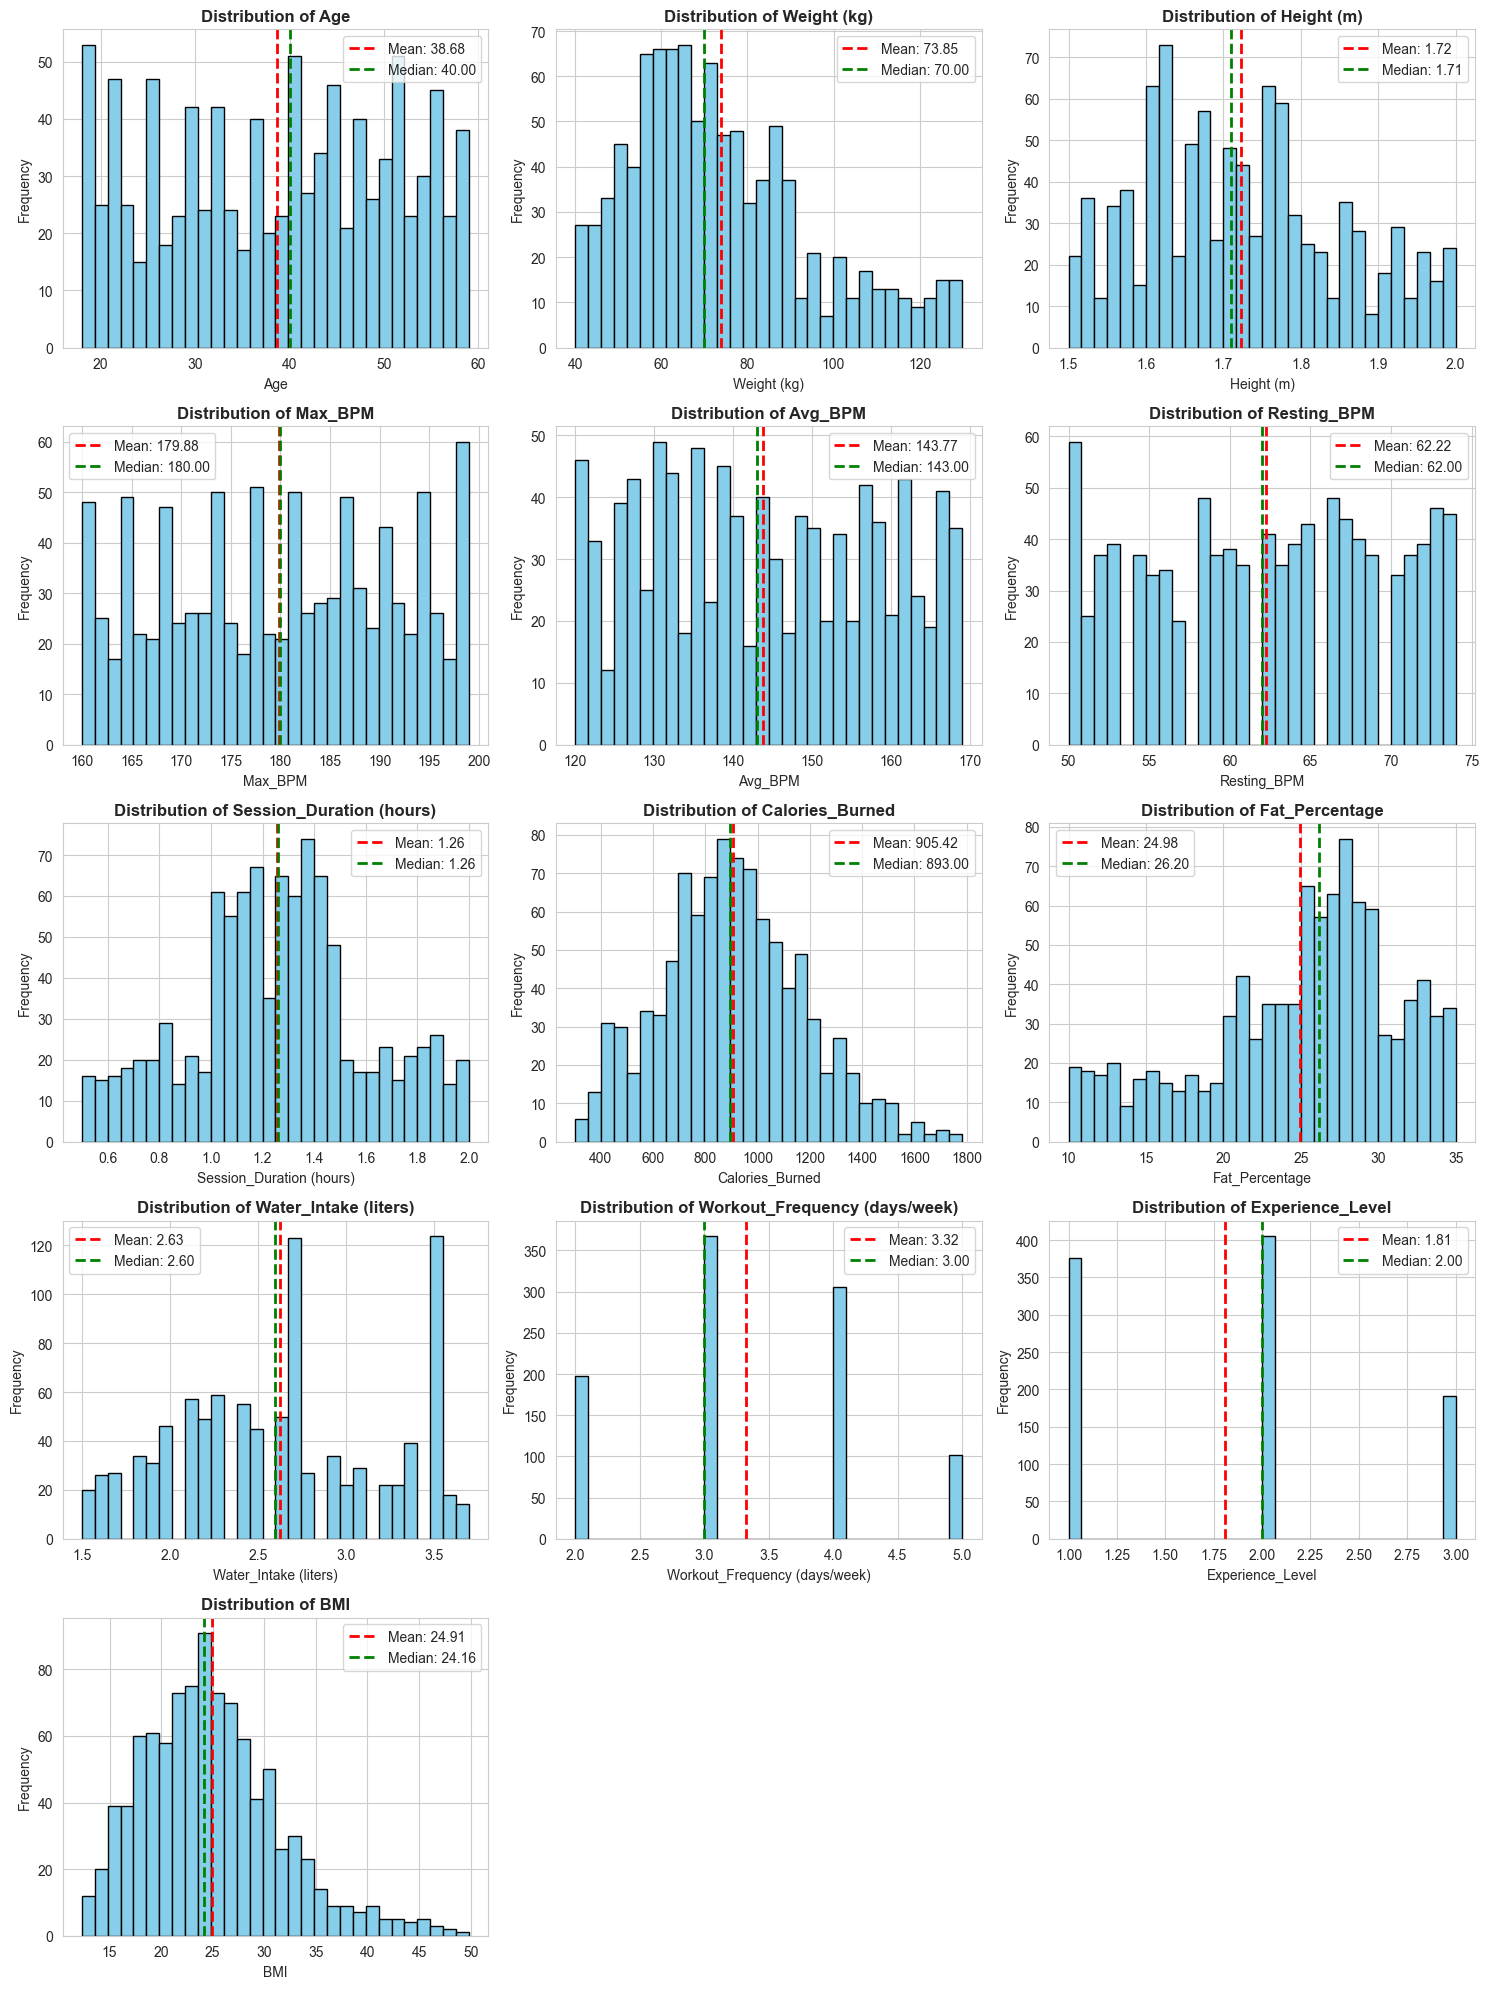

In [8]:
# # 6. Numerical Features - Distribution Analysis

# %%
print("\n" + "="*60)
print("NUMERICAL FEATURES DISTRIBUTION")
print("="*60)

# Plot distributions
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() if len(numerical_cols) > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    df[col].hist(bins=30, edgecolor='black', color='skyblue', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    
    # Add statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend()

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


CATEGORICAL FEATURES ANALYSIS

Gender
Gender
Male      511
Female    462
Name: count, dtype: int64

Unique values: 2


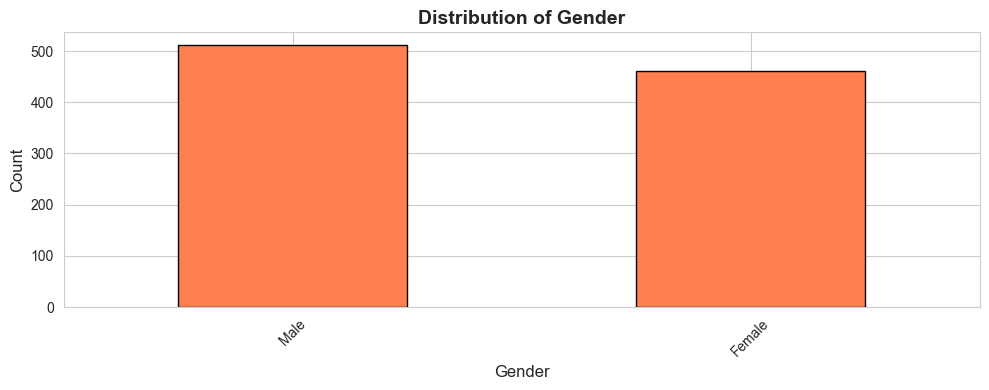

In [9]:
# # 7. Categorical Features Analysis

# %%
print("\n" + "="*60)
print("CATEGORICAL FEATURES ANALYSIS")
print("="*60)

for col in categorical_cols:
    print(f"\n{'='*40}")
    print(f"{col}")
    print(f"{'='*40}")
    print(df[col].value_counts())
    print(f"\nUnique values: {df[col].nunique()}")
    
    # Visualize
    plt.figure(figsize=(10, 4))
    df[col].value_counts().plot(kind='bar', color='coral', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


CORRELATION ANALYSIS


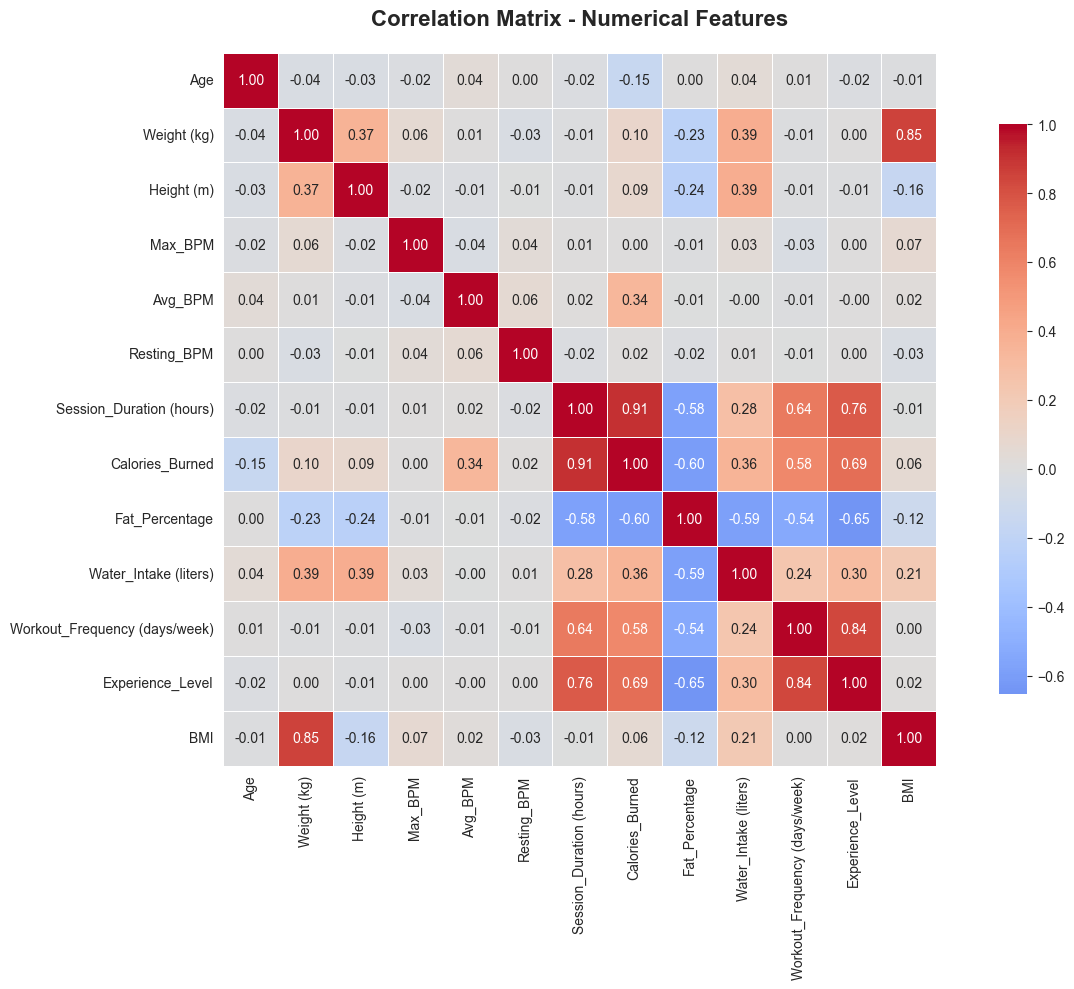


🔍 Highly Correlated Feature Pairs (|correlation| > 0.7):


,Feature 1,Feature 2,Correlation
0,Weight (kg),BMI,0.853158
1,Session_Duration (hours),Calories_Burned,0.908140
2,Session_Duration (hours),Experience_Level,0.764768
3,Workout_Frequency (days/week),Experience_Level,0.837079


In [10]:
# # 8. Correlation Analysis

# %%
print("\n" + "="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, center=0,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find highly correlated features
print("\n🔍 Highly Correlated Feature Pairs (|correlation| > 0.7):")
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr:
    high_corr_df = pd.DataFrame(high_corr)
    display(high_corr_df)
else:
    print("✅ No highly correlated features found")


NUMERICAL FEATURES vs WORKOUT TYPE


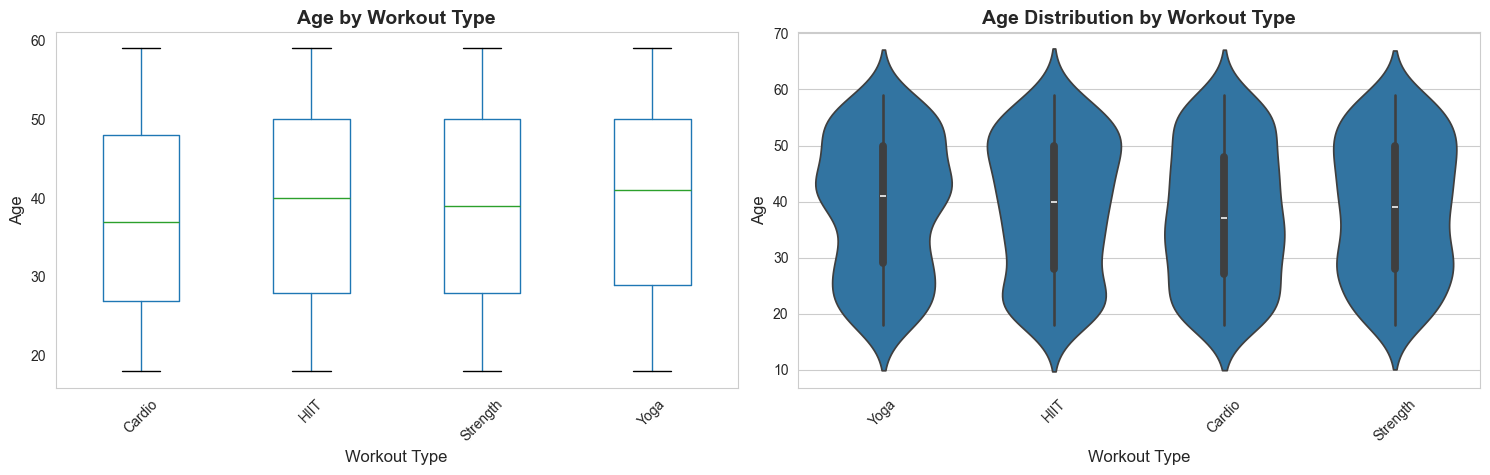


📊 Age by Workout Type:
              count   mean    std   min   25%   50%   75%   max
Workout_Type                                                   
Cardio        255.0  37.67  12.27  18.0  27.0  37.0  48.0  59.0
HIIT          221.0  38.95  12.25  18.0  28.0  40.0  50.0  59.0
Strength      258.0  38.95  12.08  18.0  28.0  39.0  50.0  59.0
Yoga          239.0  39.23  12.14  18.0  29.0  41.0  50.0  59.0
--------------------------------------------------------------------------------


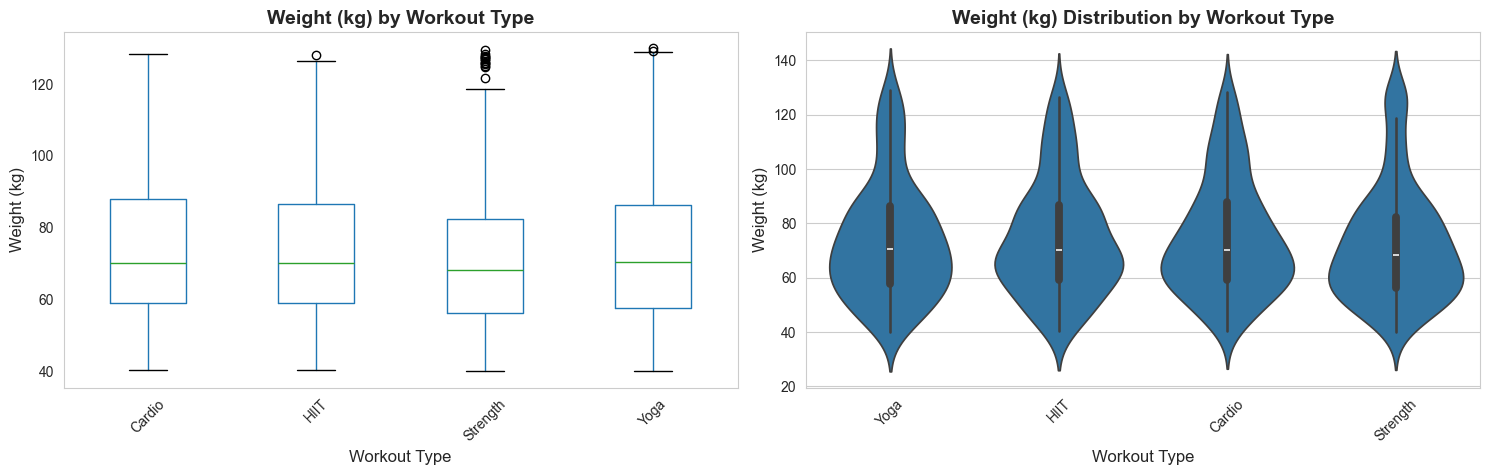


📊 Weight (kg) by Workout Type:
              count   mean    std   min    25%   50%    75%    max
Workout_Type                                                      
Cardio        255.0  74.84  21.02  40.4  59.05  70.3  87.95  128.4
HIIT          221.0  74.63  21.11  40.3  59.00  70.2  86.60  128.2
Strength      258.0  72.19  21.11  40.0  56.22  68.3  82.38  129.5
Yoga          239.0  73.89  21.62  40.0  57.75  70.4  86.25  129.9
--------------------------------------------------------------------------------


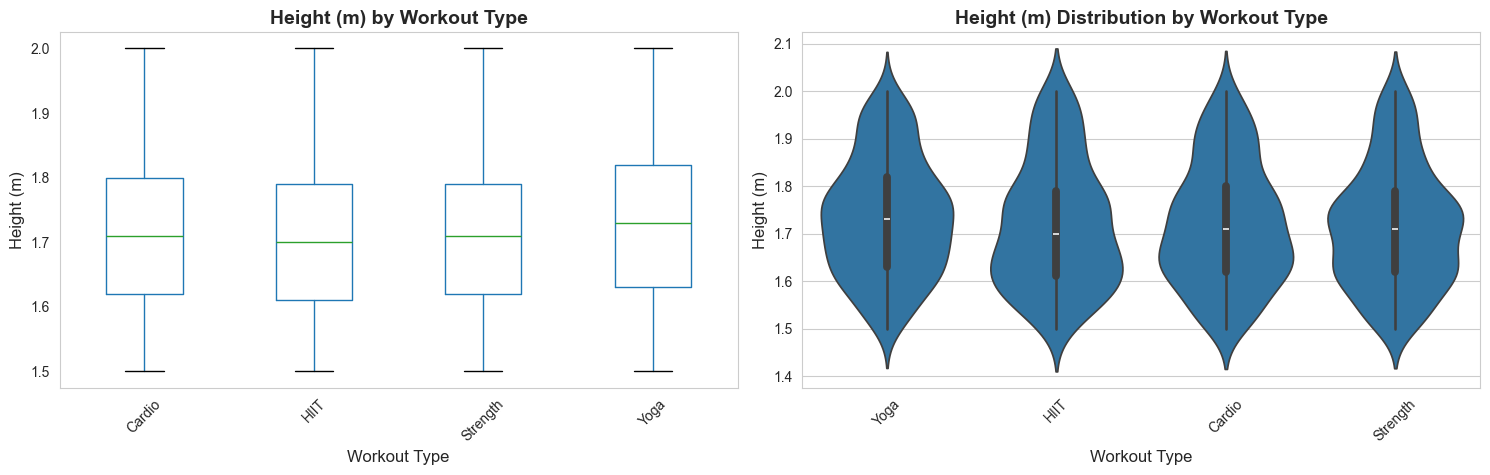


📊 Height (m) by Workout Type:
              count  mean   std  min   25%   50%   75%  max
Workout_Type                                               
Cardio        255.0  1.72  0.13  1.5  1.62  1.71  1.80  2.0
HIIT          221.0  1.72  0.13  1.5  1.61  1.70  1.79  2.0
Strength      258.0  1.72  0.13  1.5  1.62  1.71  1.79  2.0
Yoga          239.0  1.74  0.12  1.5  1.63  1.73  1.82  2.0
--------------------------------------------------------------------------------


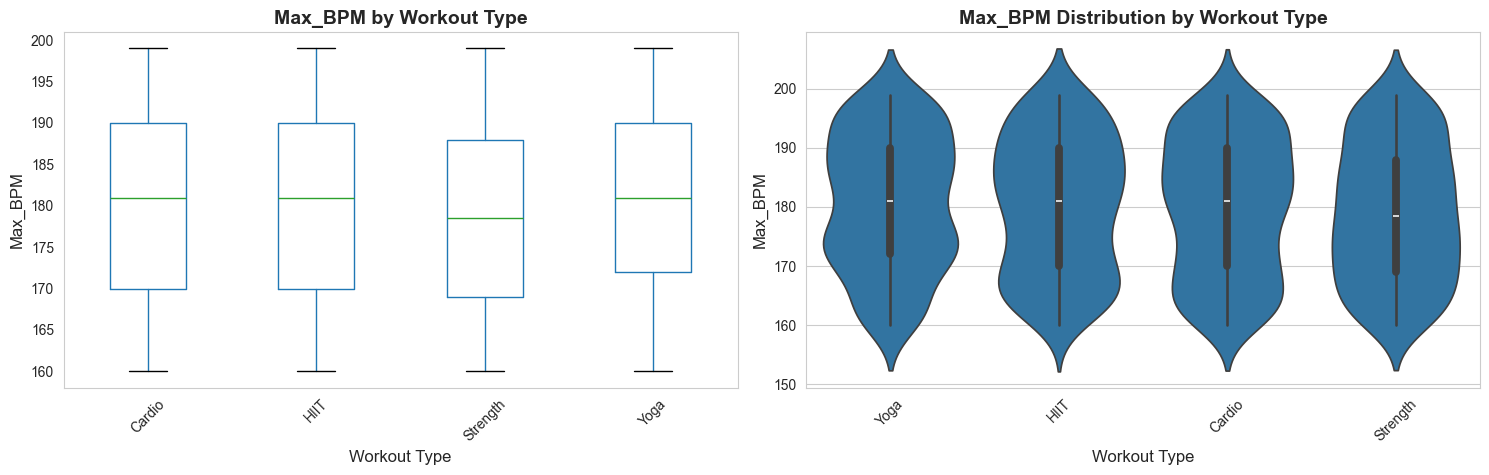


📊 Max_BPM by Workout Type:
              count    mean    std    min    25%    50%    75%    max
Workout_Type                                                         
Cardio        255.0  179.87  11.63  160.0  170.0  181.0  190.0  199.0
HIIT          221.0  180.11  11.51  160.0  170.0  181.0  190.0  199.0
Strength      258.0  179.03  11.55  160.0  169.0  178.5  188.0  199.0
Yoga          239.0  180.61  11.42  160.0  172.0  181.0  190.0  199.0
--------------------------------------------------------------------------------


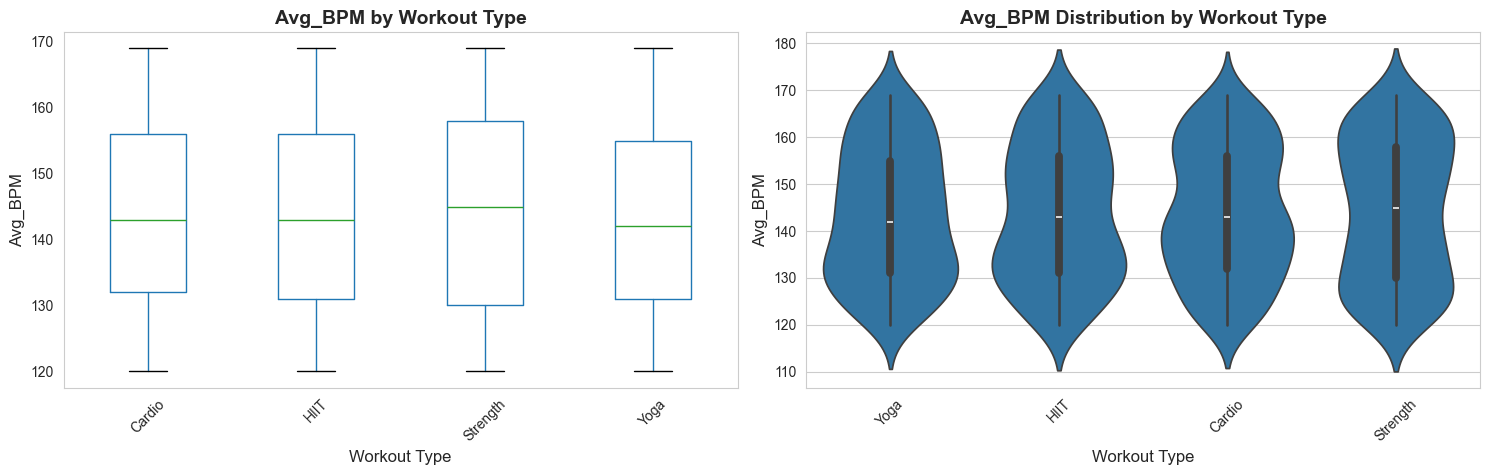


📊 Avg_BPM by Workout Type:
              count    mean    std    min    25%    50%    75%    max
Workout_Type                                                         
Cardio        255.0  143.89  13.97  120.0  132.0  143.0  156.0  169.0
HIIT          221.0  143.52  14.28  120.0  131.0  143.0  156.0  169.0
Strength      258.0  144.31  15.08  120.0  130.0  145.0  158.0  169.0
Yoga          239.0  143.27  14.06  120.0  131.0  142.0  155.0  169.0
--------------------------------------------------------------------------------


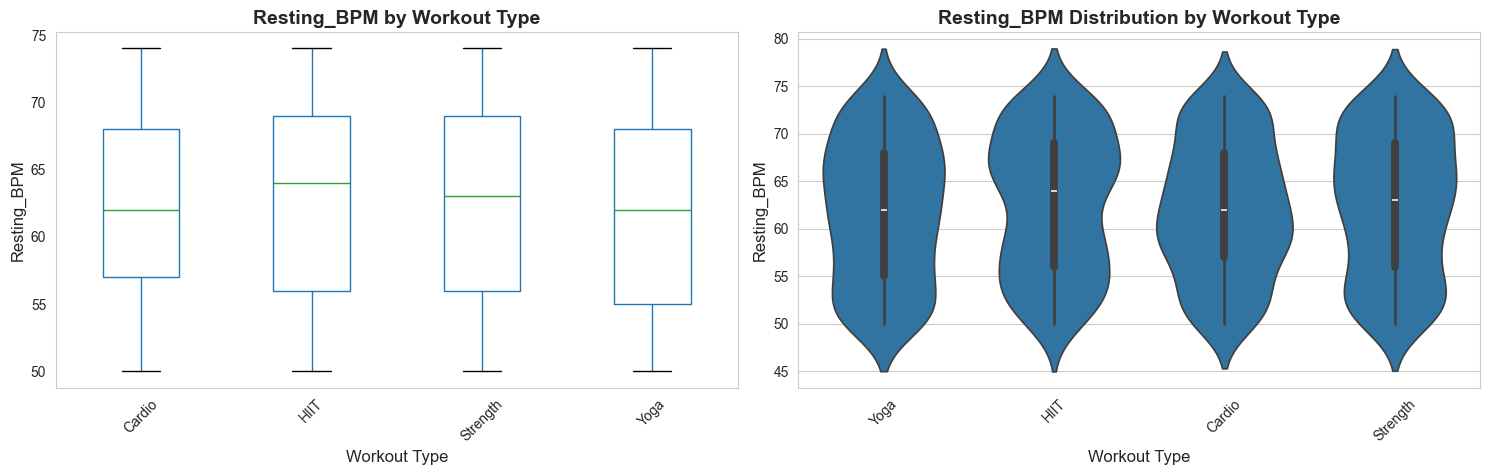


📊 Resting_BPM by Workout Type:
              count   mean   std   min   25%   50%   75%   max
Workout_Type                                                  
Cardio        255.0  61.99  7.07  50.0  57.0  62.0  68.0  74.0
HIIT          221.0  62.69  7.35  50.0  56.0  64.0  69.0  74.0
Strength      258.0  62.47  7.47  50.0  56.0  63.0  69.0  74.0
Yoga          239.0  61.78  7.43  50.0  55.0  62.0  68.0  74.0
--------------------------------------------------------------------------------


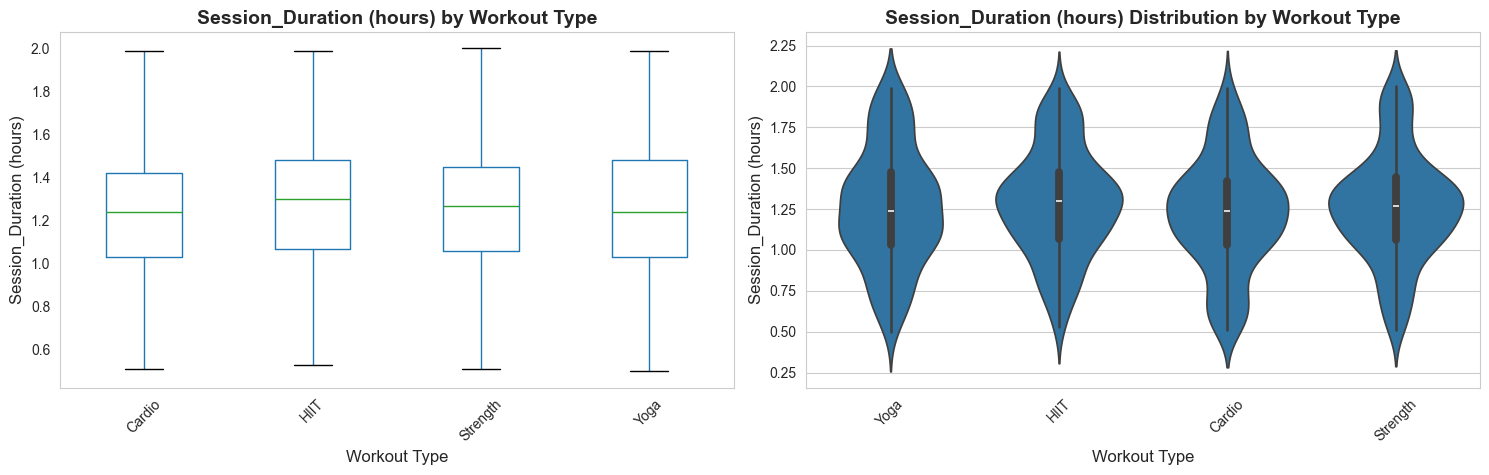


📊 Session_Duration (hours) by Workout Type:
              count  mean   std   min   25%   50%   75%   max
Workout_Type                                                 
Cardio        255.0  1.22  0.34  0.51  1.03  1.24  1.42  1.99
HIIT          221.0  1.29  0.33  0.53  1.07  1.30  1.48  1.99
Strength      258.0  1.26  0.34  0.51  1.06  1.27  1.45  2.00
Yoga          239.0  1.26  0.36  0.50  1.03  1.24  1.48  1.99
--------------------------------------------------------------------------------


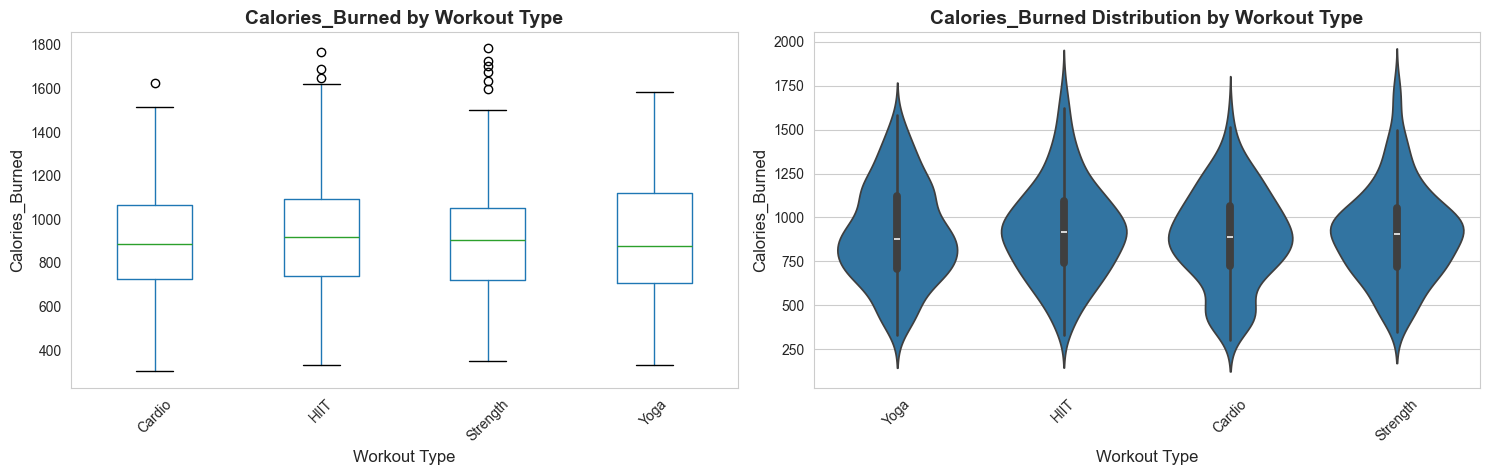


📊 Calories_Burned by Workout Type:
              count    mean     std    min     25%    50%     75%     max
Workout_Type                                                             
Cardio        255.0  884.51  270.20  303.0  725.00  888.0  1067.5  1625.0
HIIT          221.0  925.81  274.49  333.0  739.00  920.0  1095.0  1766.0
Strength      258.0  910.70  270.26  350.0  719.75  904.5  1051.0  1783.0
Yoga          239.0  903.19  276.14  330.0  708.00  876.0  1119.5  1582.0
--------------------------------------------------------------------------------


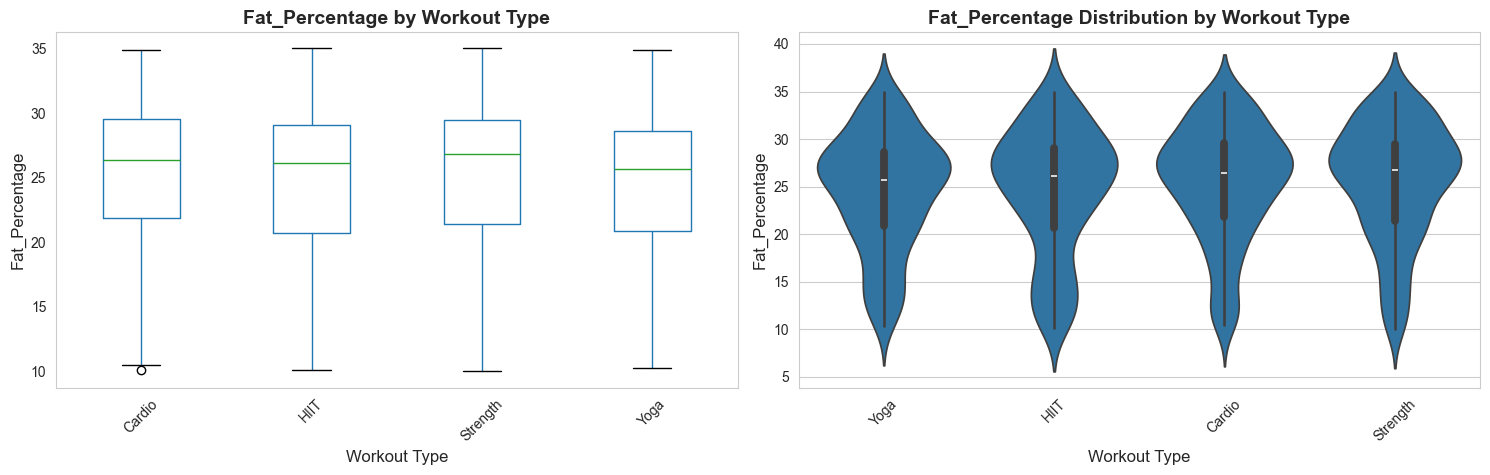


📊 Fat_Percentage by Workout Type:
              count   mean   std   min    25%   50%    75%   max
Workout_Type                                                    
Cardio        255.0  25.40  6.05  10.1  21.85  26.4  29.55  34.9
HIIT          221.0  24.46  6.66  10.1  20.70  26.1  29.10  35.0
Strength      258.0  25.46  6.21  10.0  21.42  26.8  29.48  35.0
Yoga          239.0  24.48  6.11  10.3  20.90  25.7  28.60  34.9
--------------------------------------------------------------------------------


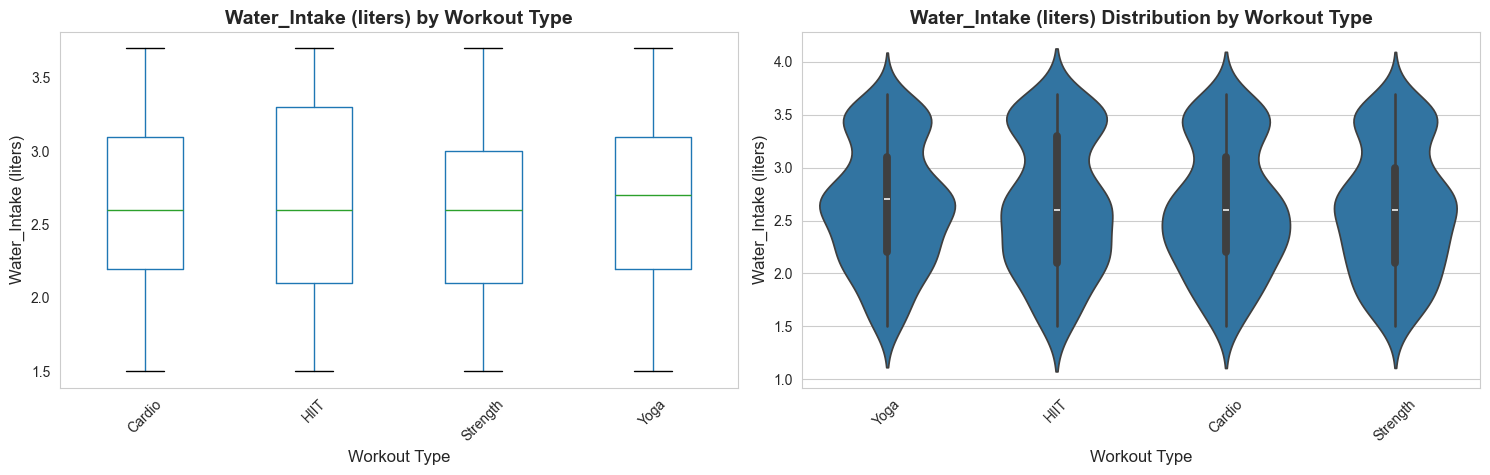


📊 Water_Intake (liters) by Workout Type:
              count  mean   std  min  25%  50%  75%  max
Workout_Type                                            
Cardio        255.0  2.62  0.60  1.5  2.2  2.6  3.1  3.7
HIIT          221.0  2.65  0.63  1.5  2.1  2.6  3.3  3.7
Strength      258.0  2.60  0.60  1.5  2.1  2.6  3.0  3.7
Yoga          239.0  2.64  0.58  1.5  2.2  2.7  3.1  3.7
--------------------------------------------------------------------------------


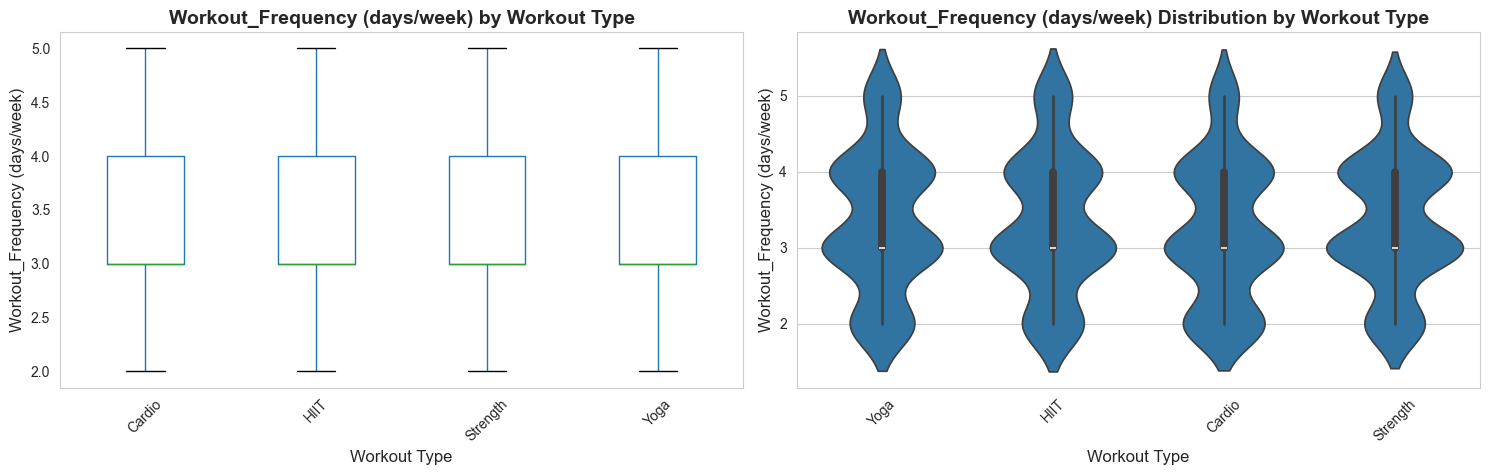


📊 Workout_Frequency (days/week) by Workout Type:
              count  mean   std  min  25%  50%  75%  max
Workout_Type                                            
Cardio        255.0  3.24  0.93  2.0  3.0  3.0  4.0  5.0
HIIT          221.0  3.35  0.92  2.0  3.0  3.0  4.0  5.0
Strength      258.0  3.36  0.88  2.0  3.0  3.0  4.0  5.0
Yoga          239.0  3.35  0.92  2.0  3.0  3.0  4.0  5.0
--------------------------------------------------------------------------------


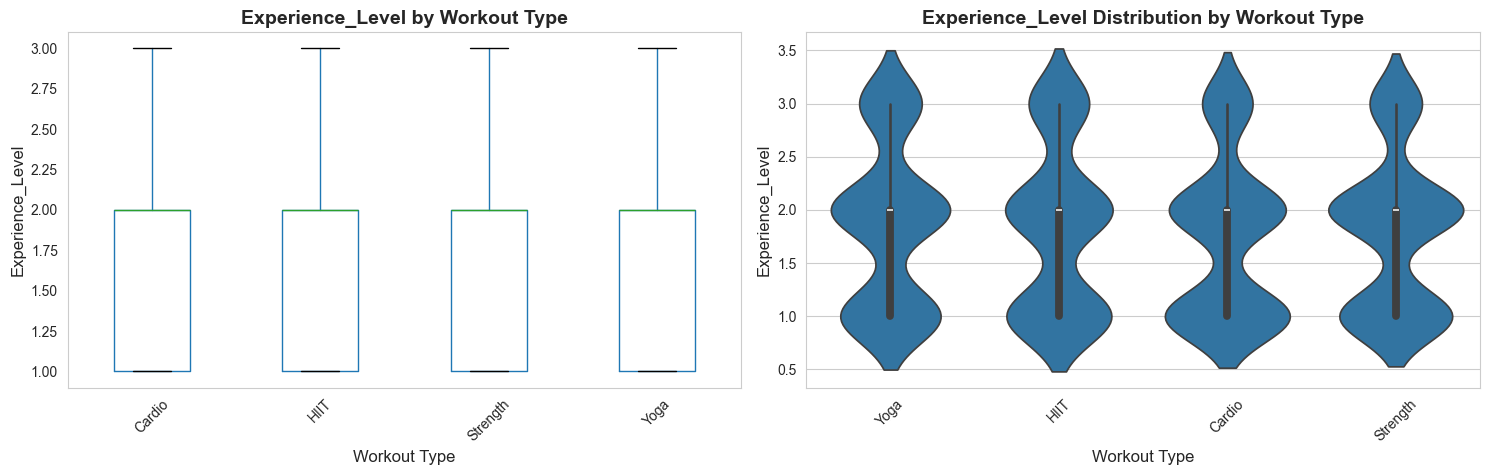


📊 Experience_Level by Workout Type:
              count  mean   std  min  25%  50%  75%  max
Workout_Type                                            
Cardio        255.0  1.75  0.73  1.0  1.0  2.0  2.0  3.0
HIIT          221.0  1.84  0.76  1.0  1.0  2.0  2.0  3.0
Strength      258.0  1.80  0.72  1.0  1.0  2.0  2.0  3.0
Yoga          239.0  1.87  0.75  1.0  1.0  2.0  2.0  3.0
--------------------------------------------------------------------------------


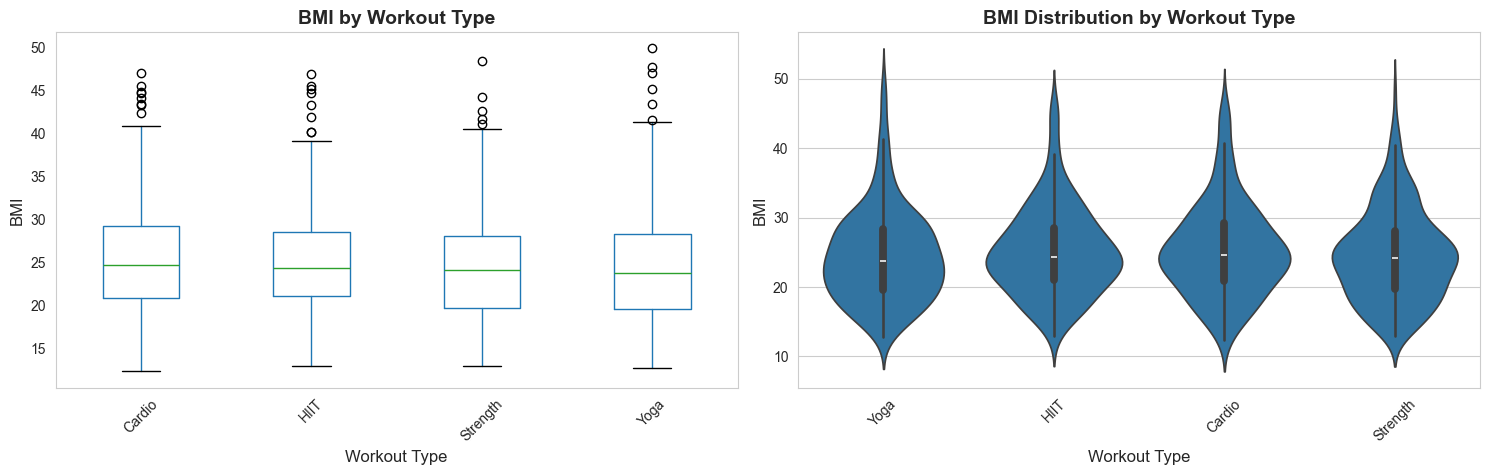


📊 BMI by Workout Type:
              count   mean   std    min    25%    50%    75%    max
Workout_Type                                                       
Cardio        255.0  25.38  6.78  12.32  20.87  24.64  29.18  46.94
HIIT          221.0  25.20  6.44  12.97  21.04  24.31  28.49  46.90
Strength      258.0  24.54  6.62  12.91  19.65  24.13  28.10  48.43
Yoga          239.0  24.55  6.77  12.73  19.60  23.74  28.33  49.84
--------------------------------------------------------------------------------


In [11]:
# # 9. Feature vs Target Analysis - Numerical Features

# %%
print("\n" + "="*60)
print("NUMERICAL FEATURES vs WORKOUT TYPE")
print("="*60)

# Box plots for each numerical feature vs workout type
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Box plot
    df.boxplot(column=col, by='Workout_Type', ax=axes[0], grid=False)
    axes[0].set_title(f'{col} by Workout Type', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Workout Type', fontsize=12)
    axes[0].set_ylabel(col, fontsize=12)
    plt.sca(axes[0])
    plt.xticks(rotation=45)
    
    # Violin plot (shows distribution better)
    sns.violinplot(data=df, x='Workout_Type', y=col, ax=axes[1])
    axes[1].set_title(f'{col} Distribution by Workout Type', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Workout Type', fontsize=12)
    axes[1].set_ylabel(col, fontsize=12)
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.suptitle('')
    plt.tight_layout()
    plt.show()
    
    # Show statistics
    print(f"\n📊 {col} by Workout Type:")
    print(df.groupby('Workout_Type')[col].describe().round(2))
    print("-" * 80)


CATEGORICAL FEATURES vs WORKOUT TYPE

Gender vs Workout_Type

Counts:


Workout_Type,Cardio,HIIT,Strength,Yoga
Gender,,,,
Female,126,107,123,106
Male,129,114,135,133



Percentages (%):


Workout_Type,Cardio,HIIT,Strength,Yoga
Gender,,,,
Female,27.27,23.16,26.62,22.94
Male,25.24,22.31,26.42,26.03


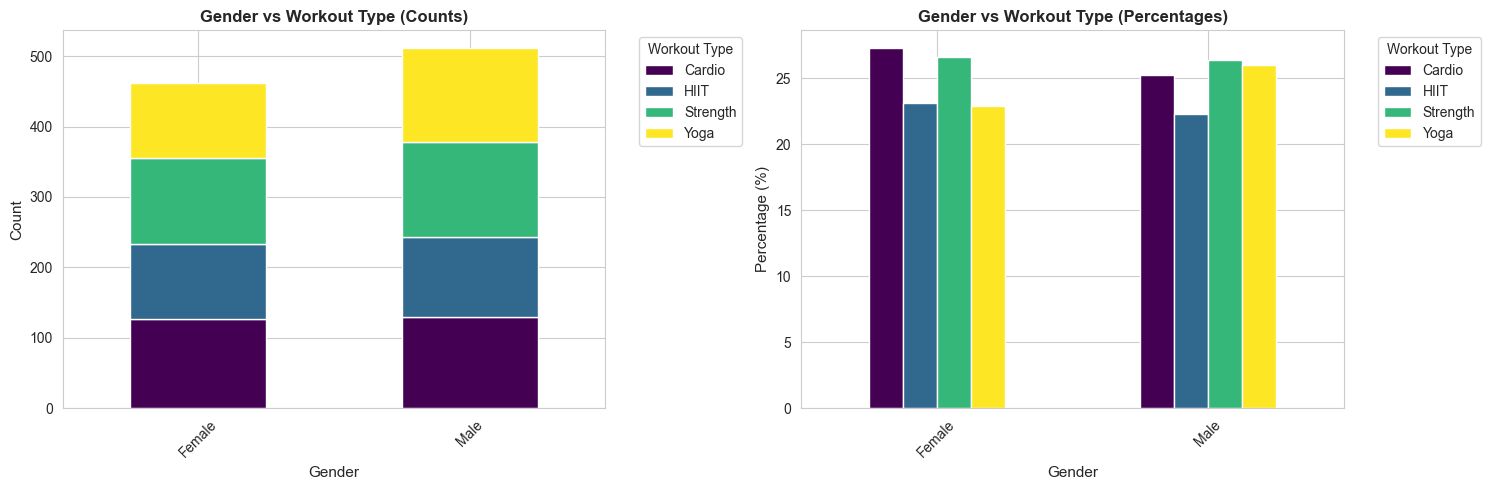

In [12]:
# # 10. Feature vs Target Analysis - Categorical Features

# %%
print("\n" + "="*60)
print("CATEGORICAL FEATURES vs WORKOUT TYPE")
print("="*60)

for col in categorical_cols:
    print(f"\n{'='*50}")
    print(f"{col} vs Workout_Type")
    print(f"{'='*50}")
    
    # Cross-tabulation
    ct = pd.crosstab(df[col], df['Workout_Type'])
    ct_pct = pd.crosstab(df[col], df['Workout_Type'], normalize='index') * 100
    
    print("\nCounts:")
    display(ct)
    print("\nPercentages (%):")
    display(ct_pct.round(2))
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Stacked bar (counts)
    ct.plot(kind='bar', stacked=True, ax=axes[0], colormap='viridis')
    axes[0].set_title(f'{col} vs Workout Type (Counts)', fontsize=12, fontweight='bold')
    axes[0].set_xlabel(col, fontsize=11)
    axes[0].set_ylabel('Count', fontsize=11)
    axes[0].legend(title='Workout Type', bbox_to_anchor=(1.05, 1))
    axes[0].tick_params(axis='x', rotation=45)
    
    # Grouped bar (percentages)
    ct_pct.plot(kind='bar', ax=axes[1], colormap='viridis')
    axes[1].set_title(f'{col} vs Workout Type (Percentages)', fontsize=12, fontweight='bold')
    axes[1].set_xlabel(col, fontsize=11)
    axes[1].set_ylabel('Percentage (%)', fontsize=11)
    axes[1].legend(title='Workout Type', bbox_to_anchor=(1.05, 1))
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

In [13]:
# # 11. Summary Statistics by Workout Type

# %%
print("\n" + "="*60)
print("SUMMARY STATISTICS BY WORKOUT TYPE")
print("="*60)

for workout in sorted(df['Workout_Type'].unique()):
    print(f"\n{'='*60}")
    print(f"📋 WORKOUT TYPE: {workout}")
    print(f"{'='*60}")
    
    workout_data = df[df['Workout_Type'] == workout]
    print(f"Sample size: {len(workout_data)} records")
    print(f"\nNumerical Features Summary:")
    display(workout_data[numerical_cols].describe().round(2))


SUMMARY STATISTICS BY WORKOUT TYPE

📋 WORKOUT TYPE: Cardio
Sample size: 255 records

Numerical Features Summary:


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00
mean,37.67,74.84,1.72,179.87,143.89,61.99,1.22,884.51,25.40,2.62,3.24,1.75,25.38
std,12.27,21.02,0.13,11.63,13.97,7.07,0.34,270.20,6.05,0.60,0.93,0.73,6.78
min,18.00,40.40,1.50,160.00,120.00,50.00,0.51,303.00,10.10,1.50,2.00,1.00,12.32
25%,27.00,59.05,1.62,170.00,132.00,57.00,1.03,725.00,21.85,2.20,3.00,1.00,20.87
50%,37.00,70.30,1.71,181.00,143.00,62.00,1.24,888.00,26.40,2.60,3.00,2.00,24.64
75%,48.00,87.95,1.80,190.00,156.00,68.00,1.42,1067.50,29.55,3.10,4.00,2.00,29.18
max,59.00,128.40,2.00,199.00,169.00,74.00,1.99,1625.00,34.90,3.70,5.00,3.00,46.94



📋 WORKOUT TYPE: HIIT
Sample size: 221 records

Numerical Features Summary:


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,221.00,221.00,221.00,221.00,221.00,221.00,221.00,221.00,221.00,221.00,221.00,221.00,221.00
mean,38.95,74.63,1.72,180.11,143.52,62.69,1.29,925.81,24.46,2.65,3.35,1.84,25.20
std,12.25,21.11,0.13,11.51,14.28,7.35,0.33,274.49,6.66,0.63,0.92,0.76,6.44
min,18.00,40.30,1.50,160.00,120.00,50.00,0.53,333.00,10.10,1.50,2.00,1.00,12.97
25%,28.00,59.00,1.61,170.00,131.00,56.00,1.07,739.00,20.70,2.10,3.00,1.00,21.04
50%,40.00,70.20,1.70,181.00,143.00,64.00,1.30,920.00,26.10,2.60,3.00,2.00,24.31
75%,50.00,86.60,1.79,190.00,156.00,69.00,1.48,1095.00,29.10,3.30,4.00,2.00,28.49
max,59.00,128.20,2.00,199.00,169.00,74.00,1.99,1766.00,35.00,3.70,5.00,3.00,46.90



📋 WORKOUT TYPE: Strength
Sample size: 258 records

Numerical Features Summary:


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,258.00,258.00,258.00,258.00,258.00,258.00,258.00,258.00,258.00,258.0,258.00,258.00,258.00
mean,38.95,72.19,1.72,179.03,144.31,62.47,1.26,910.70,25.46,2.6,3.36,1.80,24.54
std,12.08,21.11,0.13,11.55,15.08,7.47,0.34,270.26,6.21,0.6,0.88,0.72,6.62
min,18.00,40.00,1.50,160.00,120.00,50.00,0.51,350.00,10.00,1.5,2.00,1.00,12.91
25%,28.00,56.22,1.62,169.00,130.00,56.00,1.06,719.75,21.42,2.1,3.00,1.00,19.65
50%,39.00,68.30,1.71,178.50,145.00,63.00,1.27,904.50,26.80,2.6,3.00,2.00,24.13
75%,50.00,82.38,1.79,188.00,158.00,69.00,1.45,1051.00,29.48,3.0,4.00,2.00,28.10
max,59.00,129.50,2.00,199.00,169.00,74.00,2.00,1783.00,35.00,3.7,5.00,3.00,48.43



📋 WORKOUT TYPE: Yoga
Sample size: 239 records

Numerical Features Summary:


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00
mean,39.23,73.89,1.74,180.61,143.27,61.78,1.26,903.19,24.48,2.64,3.35,1.87,24.55
std,12.14,21.62,0.12,11.42,14.06,7.43,0.36,276.14,6.11,0.58,0.92,0.75,6.77
min,18.00,40.00,1.50,160.00,120.00,50.00,0.50,330.00,10.30,1.50,2.00,1.00,12.73
25%,29.00,57.75,1.63,172.00,131.00,55.00,1.03,708.00,20.90,2.20,3.00,1.00,19.60
50%,41.00,70.40,1.73,181.00,142.00,62.00,1.24,876.00,25.70,2.70,3.00,2.00,23.74
75%,50.00,86.25,1.82,190.00,155.00,68.00,1.48,1119.50,28.60,3.10,4.00,2.00,28.33
max,59.00,129.90,2.00,199.00,169.00,74.00,1.99,1582.00,34.90,3.70,5.00,3.00,49.84


In [14]:
# # 12. Key Insights and Observations

# %%
print("\n" + "="*60)
print("KEY INSIGHTS FROM EDA")
print("="*60)

print("""
📌 THINGS TO NOTE:

1. CLASS BALANCE:
   - Check if workout types are evenly distributed
   - If imbalanced, might need stratified sampling

2. FEATURE IMPORTANCE CANDIDATES:
   - Look for features with clear differences across workout types
   - Example: Do beginners prefer certain workouts?

3. DATA QUALITY:
   - Any outliers?
   - Any suspicious values?
   - All data types correct?

4. CORRELATIONS:
   - Highly correlated features might be redundant
   - Consider feature engineering or selection

5. NEXT STEPS:
   - Feature engineering (create new features)
   - Feature encoding (categorical → numerical)
   - Feature scaling/normalization
   - Train-test split
   - Model training

""")

print("="*60)
print("✅ INITIAL EDA COMPLETE!")
print("="*60)


KEY INSIGHTS FROM EDA

📌 THINGS TO NOTE:

1. CLASS BALANCE:
   - Check if workout types are evenly distributed
   - If imbalanced, might need stratified sampling

2. FEATURE IMPORTANCE CANDIDATES:
   - Look for features with clear differences across workout types
   - Example: Do beginners prefer certain workouts?

3. DATA QUALITY:
   - Any outliers?
   - Any suspicious values?
   - All data types correct?

4. CORRELATIONS:
   - Highly correlated features might be redundant
   - Consider feature engineering or selection

5. NEXT STEPS:
   - Feature engineering (create new features)
   - Feature encoding (categorical → numerical)
   - Feature scaling/normalization
   - Train-test split
   - Model training


✅ INITIAL EDA COMPLETE!


In [22]:
# ============================================
# DATA PREPARATION & FEATURE ENGINEERING
# ============================================

# # 1. Clean Column Names

print("="*60)
print("CLEANING COLUMN NAMES")
print("="*60)

# Make column names cleaner (remove spaces and special chars)
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('/', '_')

print("\n✅ New column names:")
print(df.columns.tolist())

CLEANING COLUMN NAMES

✅ New column names:
['Age', 'Gender', 'Weight_kg', 'Height_m', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration_hours', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake_liters', 'Workout_Frequency_days_week', 'Experience_Level', 'BMI', 'BMI_Category', 'Age_Group', 'Workout_Intensity', 'Heart_Rate_Reserve', 'Calories_per_Hour', 'Fitness_Score']


In [23]:
# # 2. Check Experience Level Encoding

# %%
print("\n" + "="*60)
print("EXPERIENCE LEVEL CHECK")
print("="*60)

print(f"\nUnique values: {df['Experience_Level'].unique()}")
print(f"\nValue counts:")
print(df['Experience_Level'].value_counts().sort_index())

# Map numeric to labels (if needed)
# 1=Beginner, 2=Intermediate, 3=Expert
experience_map = {
    1: 'Beginner',
    2: 'Intermediate', 
    3: 'Expert'
}

# Check if mapping is needed
if df['Experience_Level'].dtype in ['int64', 'float64']:
    print("\n⚠️ Experience_Level is numeric, converting to labels...")
    df['Experience_Level'] = df['Experience_Level'].map(experience_map)
    print("✅ Converted!")
    print(df['Experience_Level'].value_counts())


EXPERIENCE LEVEL CHECK

Unique values: ['Expert' 'Intermediate' 'Beginner']

Value counts:
Experience_Level
Beginner        376
Expert          191
Intermediate    406
Name: count, dtype: int64


In [26]:
# # 3. Feature Engineering - Create New Features

print("\n" + "="*60)
print("FEATURE ENGINEERING")
print("="*60)

# 1. BMI Categories
df['BMI_Category'] = pd.cut(df['BMI'], 
                             bins=[0, 18.5, 25, 30, 100],
                             labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# 2. Age Groups
df['Age_Group'] = pd.cut(df['Age'],
                          bins=[0, 25, 35, 45, 100],
                          labels=['18-25', '26-35', '36-45', '46+'])

# 3. Workout Intensity (based on avg BPM relative to max BPM)
df['Workout_Intensity'] = (df['Avg_BPM'] / df['Max_BPM']) * 100

# 4. Heart Rate Reserve (Max - Resting)
df['Heart_Rate_Reserve'] = df['Max_BPM'] - df['Resting_BPM']

# 5. Calories per Hour
df['Calories_per_Hour'] = df['Calories_Burned'] / df['Session_Duration_hours']

# 6. Fitness Level (combination of multiple factors)
# Higher is better: high workout frequency, good heart metrics, regular water intake
df['Fitness_Score'] = (
    (df['Workout_Frequency_days_week'] / 7 * 30) +  # Frequency score (max 30)
    (df['Water_Intake_liters'] / 4 * 20) +  # Hydration score (max 20)
    ((220 - df['Age'] - df['Resting_BPM']) / 100 * 30) +  # Heart health (max 30)
    ((100 - df['Fat_Percentage']) / 100 * 20)  # Body composition (max 20)
)

print("✅ Created new features:")
print("  1. BMI_Category")
print("  2. Age_Group")
print("  3. Workout_Intensity")
print("  4. Heart_Rate_Reserve")
print("  5. Calories_per_Hour")
print("  6. Fitness_Score")

print("\n")
print(df[['BMI_Category', 'Age_Group', 'Workout_Intensity', 'Heart_Rate_Reserve', 'Calories_per_Hour', 'Fitness_Score']].head())


FEATURE ENGINEERING
✅ Created new features:
  1. BMI_Category
  2. Age_Group
  3. Workout_Intensity
  4. Heart_Rate_Reserve
  5. Calories_per_Hour
  6. Fitness_Score


  BMI_Category Age_Group  Workout_Intensity  Heart_Rate_Reserve  \
0        Obese       46+          87.222222                 120   
1        Obese       46+          84.357542                 113   
2       Normal     26-35          73.053892                 113   
3  Underweight     18-25          86.315789                 134   
4  Underweight     36-45          84.042553                 120   

   Calories_per_Hour  Fitness_Score  
0         776.923077      83.322857  
1         679.230769      73.262857  
2         609.909910      82.162857  
3         901.694915      79.297143  
4         868.750000      75.217143  


In [27]:
# # 4. Prepare Features and Target

# %%
print("\n" + "="*60)
print("PREPARING FEATURES AND TARGET")
print("="*60)

# Define target
y = df['Workout_Type']

# Define features to use
numerical_features = [
    'Age', 'Weight_kg', 'Height_m', 'BMI',
    'Max_BPM', 'Avg_BPM', 'Resting_BPM',
    'Session_Duration_hours', 'Calories_Burned',
    'Fat_Percentage', 'Water_Intake_liters',
    'Workout_Frequency_days_week',
    'Workout_Intensity', 'Heart_Rate_Reserve',
    'Calories_per_Hour', 'Fitness_Score'
]

categorical_features = [
    'Gender', 'Experience_Level', 'BMI_Category', 'Age_Group'
]

print(f"\n📊 Numerical features: {len(numerical_features)}")
print(f"📝 Categorical features: {len(categorical_features)}")
print(f"🎯 Target variable: Workout_Type")
print(f"\nTotal features: {len(numerical_features) + len(categorical_features)}")


PREPARING FEATURES AND TARGET

📊 Numerical features: 16
📝 Categorical features: 4
🎯 Target variable: Workout_Type

Total features: 20


In [28]:
# # 5. Encode Categorical Variables

# %%
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

print("\n" + "="*60)
print("ENCODING CATEGORICAL VARIABLES")
print("="*60)

# Create a copy for encoding
df_encoded = df.copy()

# One-Hot Encoding for categorical features
print("\n🔄 Applying One-Hot Encoding...")

# Use pd.get_dummies for one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features, drop_first=True)

print(f"\n✅ Encoding complete!")
print(f"New shape: {df_encoded.shape}")
print(f"New columns: {df_encoded.shape[1]} (increased from {df.shape[1]})")

# Show new columns created
new_cols = [col for col in df_encoded.columns if col not in df.columns]
print(f"\n📝 New encoded columns ({len(new_cols)}):")
for col in new_cols:
    print(f"  - {col}")


ENCODING CATEGORICAL VARIABLES

🔄 Applying One-Hot Encoding...

✅ Encoding complete!
New shape: (973, 26)
New columns: 26 (increased from 21)

📝 New encoded columns (9):
  - Gender_Male
  - Experience_Level_Expert
  - Experience_Level_Intermediate
  - BMI_Category_Normal
  - BMI_Category_Overweight
  - BMI_Category_Obese
  - Age_Group_26-35
  - Age_Group_36-45
  - Age_Group_46+


In [29]:
# # 6. Prepare Final Feature Matrix

# %%
print("\n" + "="*60)
print("PREPARING FINAL FEATURE MATRIX")
print("="*60)

# Remove target from features
X = df_encoded.drop('Workout_Type', axis=1)
y = df_encoded['Workout_Type']

print(f"\n✅ Feature matrix (X) shape: {X.shape}")
print(f"✅ Target vector (y) shape: {y.shape}")
print(f"\nFeature columns ({X.shape[1]}):")
print(X.columns.tolist())


PREPARING FINAL FEATURE MATRIX

✅ Feature matrix (X) shape: (973, 25)
✅ Target vector (y) shape: (973,)

Feature columns (25):
['Age', 'Weight_kg', 'Height_m', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration_hours', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake_liters', 'Workout_Frequency_days_week', 'BMI', 'Workout_Intensity', 'Heart_Rate_Reserve', 'Calories_per_Hour', 'Fitness_Score', 'Gender_Male', 'Experience_Level_Expert', 'Experience_Level_Intermediate', 'BMI_Category_Normal', 'BMI_Category_Overweight', 'BMI_Category_Obese', 'Age_Group_26-35', 'Age_Group_36-45', 'Age_Group_46+']


In [30]:
# # 7. Train-Validation-Test Split

# %%
from sklearn.model_selection import train_test_split

print("\n" + "="*60)
print("SPLITTING DATA")
print("="*60)

# First split: separate test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: separate validation from train (25% of 80% = 20% overall)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"\n📊 Data Split:")
print(f"  Training set:   {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"  Test set:       {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"  Total:          {len(X)} samples")

# Check class distribution in each set
print(f"\n🎯 Target distribution:")
print(f"\nTraining set:")
print(y_train.value_counts())
print(f"\nValidation set:")
print(y_val.value_counts())
print(f"\nTest set:")
print(y_test.value_counts())


SPLITTING DATA

📊 Data Split:
  Training set:   583 samples (59.9%)
  Validation set: 195 samples (20.0%)
  Test set:       195 samples (20.0%)
  Total:          973 samples

🎯 Target distribution:

Training set:
Workout_Type
Strength    154
Cardio      153
Yoga        143
HIIT        133
Name: count, dtype: int64

Validation set:
Workout_Type
Strength    52
Cardio      51
Yoga        48
HIIT        44
Name: count, dtype: int64

Test set:
Workout_Type
Strength    52
Cardio      51
Yoga        48
HIIT        44
Name: count, dtype: int64


In [31]:
# # 8. Feature Scaling (Optional but Recommended)

# %%
from sklearn.preprocessing import StandardScaler

print("\n" + "="*60)
print("FEATURE SCALING")
print("="*60)

# Initialize scaler
scaler = StandardScaler()

# Fit on training data only (important!)
scaler.fit(X_train)

# Transform all sets
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame (to keep column names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✅ Scaling complete!")
print(f"\nBefore scaling (first feature mean): {X_train.iloc[:, 0].mean():.2f}")
print(f"After scaling (first feature mean): {X_train_scaled.iloc[:, 0].mean():.2f}")


FEATURE SCALING
✅ Scaling complete!

Before scaling (first feature mean): 38.10
After scaling (first feature mean): 0.00


In [32]:
# # 9. Summary

# %%
print("\n" + "="*60)
print("DATA PREPARATION SUMMARY")
print("="*60)

print(f"""
✅ COMPLETED STEPS:

1. Column names cleaned
2. Experience_Level checked/converted
3. Created 6 new engineered features
4. Encoded categorical variables (one-hot encoding)
5. Split data: 60% train, 20% validation, 20% test
6. Applied feature scaling (StandardScaler)

📊 FINAL DATA:
- Features: {X_train.shape[1]}
- Training samples: {X_train.shape[0]}
- Validation samples: {X_val.shape[0]}
- Test samples: {X_test.shape[0]}
- Classes: {y.nunique()} (balanced)

🎯 READY FOR MODEL TRAINING!

Next steps:
1. Train baseline model (Logistic Regression)
2. Train Decision Tree
3. Train Random Forest
4. Train XGBoost
5. Compare models and select best one
""")


DATA PREPARATION SUMMARY

✅ COMPLETED STEPS:

1. Column names cleaned
2. Experience_Level checked/converted
3. Created 6 new engineered features
4. Encoded categorical variables (one-hot encoding)
5. Split data: 60% train, 20% validation, 20% test
6. Applied feature scaling (StandardScaler)

📊 FINAL DATA:
- Features: 25
- Training samples: 583
- Validation samples: 195
- Test samples: 195
- Classes: 4 (balanced)

🎯 READY FOR MODEL TRAINING!

Next steps:
1. Train baseline model (Logistic Regression)
2. Train Decision Tree
3. Train Random Forest
4. Train XGBoost
5. Compare models and select best one



In [33]:
# Save prepared data for later use
print("\n💾 Saving prepared data...")
import pickle

# Save datasets
with open('models/data_prepared.pkl', 'wb') as f:
    pickle.dump({
        'X_train': X_train_scaled,
        'X_val': X_val_scaled,
        'X_test': X_test_scaled,
        'y_train': y_train,
        'y_val': y_val,
        'y_test': y_test,
        'scaler': scaler,
        'feature_names': X_train.columns.tolist()
    }, f)

print("✅ Data saved to 'models/data_prepared.pkl'")


💾 Saving prepared data...
✅ Data saved to 'models/data_prepared.pkl'


In [36]:
# Just checking the file
import os
print(os.path.exists('models/data_prepared.pkl'))
size = os.path.getsize('models/data_prepared.pkl') / 1024  # KB
print(f"File size: {size:.2f} KB")

True
File size: 217.98 KB


In [37]:
# ============================================
# MODEL TRAINING AND EVALUATION
# ============================================

# %% [markdown]
# # 1. Load Prepared Data

# %%
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, classification_report, 
                            confusion_matrix, roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')

print("="*60)
print("LOADING PREPARED DATA")
print("="*60)

# Load the prepared data
with open('models/data_prepared.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train']
X_val = data['X_val']
X_test = data['X_test']
y_train = data['y_train']
y_val = data['y_val']
y_test = data['y_test']
scaler = data['scaler']
feature_names = data['feature_names']

print(f"\n✅ Data loaded successfully!")
print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Test samples: {len(X_test)}")
print(f"Number of features: {len(feature_names)}")
print(f"Classes: {sorted(y_train.unique())}")

LOADING PREPARED DATA

✅ Data loaded successfully!
Training samples: 583
Validation samples: 195
Test samples: 195
Number of features: 25
Classes: ['Cardio', 'HIIT', 'Strength', 'Yoga']



MODEL 1: LOGISTIC REGRESSION (BASELINE)

🔄 Training Logistic Regression...
✅ Training complete!

📊 Results:
  Training Accuracy:   0.3739 (37.39%)
  Validation Accuracy: 0.2923 (29.23%)

📋 Classification Report (Validation Set):
              precision    recall  f1-score   support

      Cardio       0.34      0.37      0.36        51
        HIIT       0.27      0.25      0.26        44
    Strength       0.31      0.31      0.31        52
        Yoga       0.24      0.23      0.23        48

    accuracy                           0.29       195
   macro avg       0.29      0.29      0.29       195
weighted avg       0.29      0.29      0.29       195



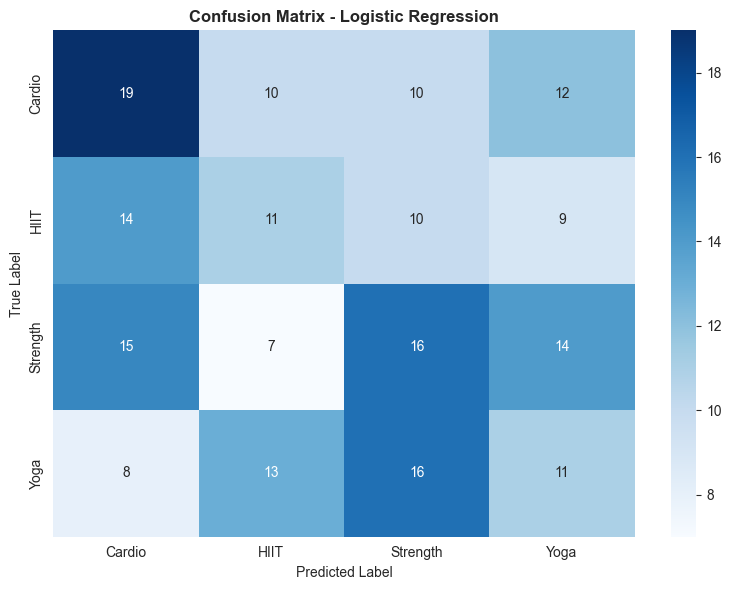

In [38]:
# # 2. Model 1: Logistic Regression (Baseline)

# %%
print("\n" + "="*60)
print("MODEL 1: LOGISTIC REGRESSION (BASELINE)")
print("="*60)

# Train Logistic Regression
lr_model = LogisticRegression(
    multi_class='multinomial',  # For multi-class classification
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

print("\n🔄 Training Logistic Regression...")
lr_model.fit(X_train, y_train)
print("✅ Training complete!")

# Predictions
y_train_pred_lr = lr_model.predict(X_train)
y_val_pred_lr = lr_model.predict(X_val)

# Accuracy
train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
val_acc_lr = accuracy_score(y_val, y_val_pred_lr)

print(f"\n📊 Results:")
print(f"  Training Accuracy:   {train_acc_lr:.4f} ({train_acc_lr*100:.2f}%)")
print(f"  Validation Accuracy: {val_acc_lr:.4f} ({val_acc_lr*100:.2f}%)")

# Classification Report
print(f"\n📋 Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_val, y_val_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y_val.unique()),
            yticklabels=sorted(y_val.unique()))
plt.title('Confusion Matrix - Logistic Regression', fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


MODEL 2: DECISION TREE

🔄 Training Decision Tree...
✅ Training complete!

📊 Results:
  Training Accuracy:   0.5094 (50.94%)
  Validation Accuracy: 0.2872 (28.72%)

📋 Classification Report (Validation Set):
              precision    recall  f1-score   support

      Cardio       0.34      0.22      0.27        51
        HIIT       0.29      0.23      0.25        44
    Strength       0.26      0.37      0.30        52
        Yoga       0.30      0.33      0.31        48

    accuracy                           0.29       195
   macro avg       0.30      0.29      0.28       195
weighted avg       0.30      0.29      0.28       195



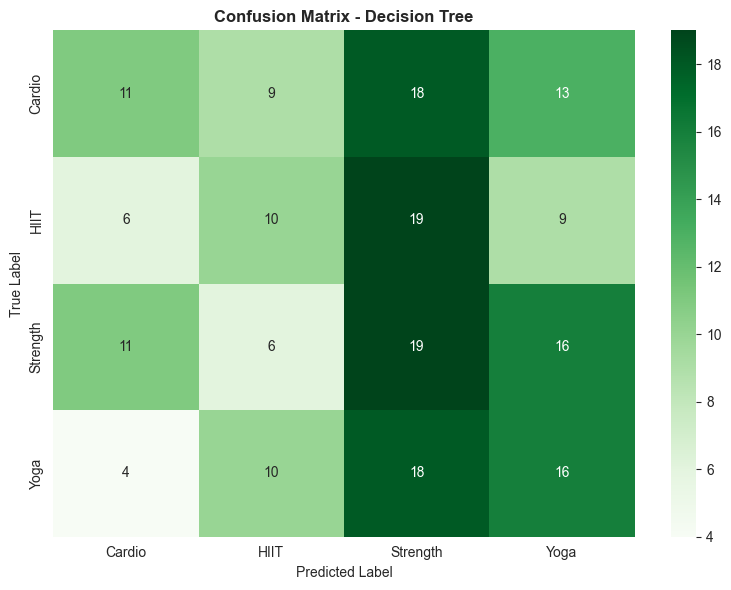


🔍 Top 10 Important Features (Decision Tree):
                          feature  importance
14              Calories_per_Hour    0.213365
15                  Fitness_Score    0.116510
11                            BMI    0.116396
8                  Fat_Percentage    0.089017
1                       Weight_kg    0.068307
7                 Calories_Burned    0.067568
6          Session_Duration_hours    0.060653
12              Workout_Intensity    0.059974
0                             Age    0.058571
18  Experience_Level_Intermediate    0.032194


<Figure size 1000x600 with 0 Axes>

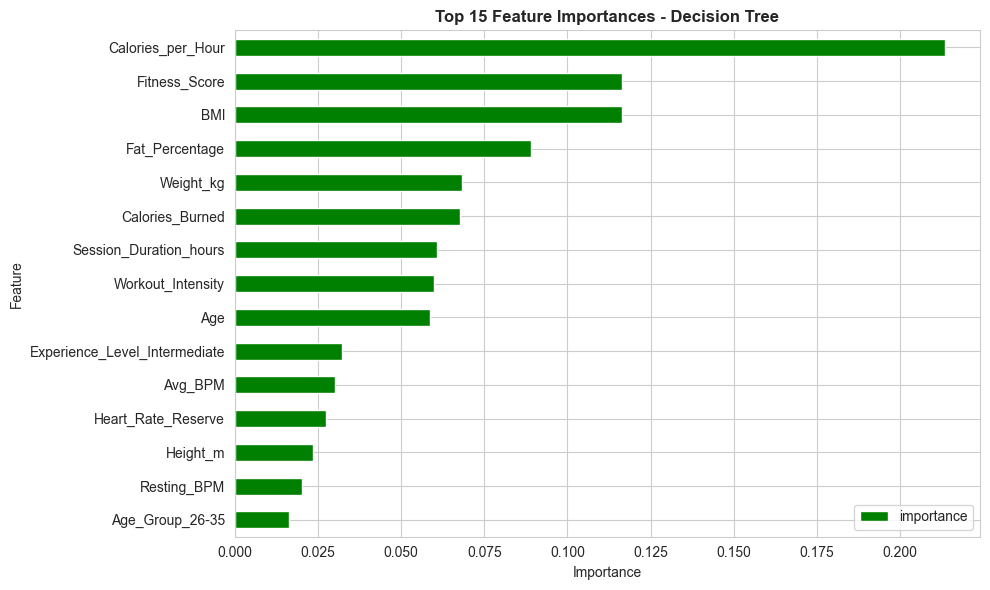

In [39]:
# # 3. Model 2: Decision Tree

# %%
print("\n" + "="*60)
print("MODEL 2: DECISION TREE")
print("="*60)

# Train Decision Tree
dt_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

print("\n🔄 Training Decision Tree...")
dt_model.fit(X_train, y_train)
print("✅ Training complete!")

# Predictions
y_train_pred_dt = dt_model.predict(X_train)
y_val_pred_dt = dt_model.predict(X_val)

# Accuracy
train_acc_dt = accuracy_score(y_train, y_train_pred_dt)
val_acc_dt = accuracy_score(y_val, y_val_pred_dt)

print(f"\n📊 Results:")
print(f"  Training Accuracy:   {train_acc_dt:.4f} ({train_acc_dt*100:.2f}%)")
print(f"  Validation Accuracy: {val_acc_dt:.4f} ({val_acc_dt*100:.2f}%)")

# Classification Report
print(f"\n📋 Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_val, y_val_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=sorted(y_val.unique()),
            yticklabels=sorted(y_val.unique()))
plt.title('Confusion Matrix - Decision Tree', fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Feature Importance (Decision Tree)
feature_importance_dt = pd.DataFrame({
    'feature': feature_names,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n🔍 Top 10 Important Features (Decision Tree):")
print(feature_importance_dt.head(10))

plt.figure(figsize=(10, 6))
feature_importance_dt.head(15).plot(x='feature', y='importance', kind='barh', color='green')
plt.title('Top 15 Feature Importances - Decision Tree', fontweight='bold')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


MODEL 3: RANDOM FOREST

🔄 Training Random Forest...
✅ Training complete!

📊 Results:
  Training Accuracy:   0.9623 (96.23%)
  Validation Accuracy: 0.2769 (27.69%)

📋 Classification Report (Validation Set):
              precision    recall  f1-score   support

      Cardio       0.30      0.35      0.32        51
        HIIT       0.32      0.25      0.28        44
    Strength       0.27      0.31      0.29        52
        Yoga       0.23      0.19      0.20        48

    accuracy                           0.28       195
   macro avg       0.28      0.27      0.27       195
weighted avg       0.28      0.28      0.27       195



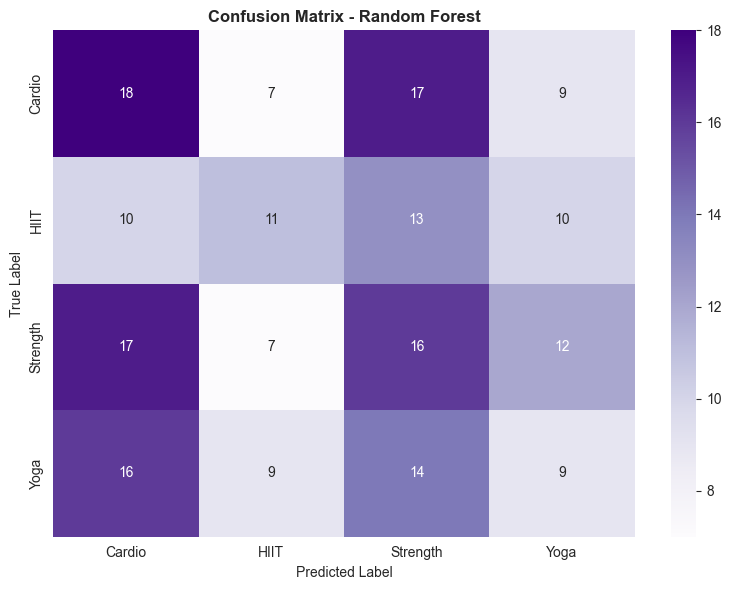


🔍 Top 10 Important Features (Random Forest):
                   feature  importance
15           Fitness_Score    0.083442
14       Calories_per_Hour    0.075546
11                     BMI    0.070375
8           Fat_Percentage    0.069252
1                Weight_kg    0.068307
7          Calories_Burned    0.064647
2                 Height_m    0.064306
12       Workout_Intensity    0.060135
6   Session_Duration_hours    0.058689
13      Heart_Rate_Reserve    0.057305


<Figure size 1000x600 with 0 Axes>

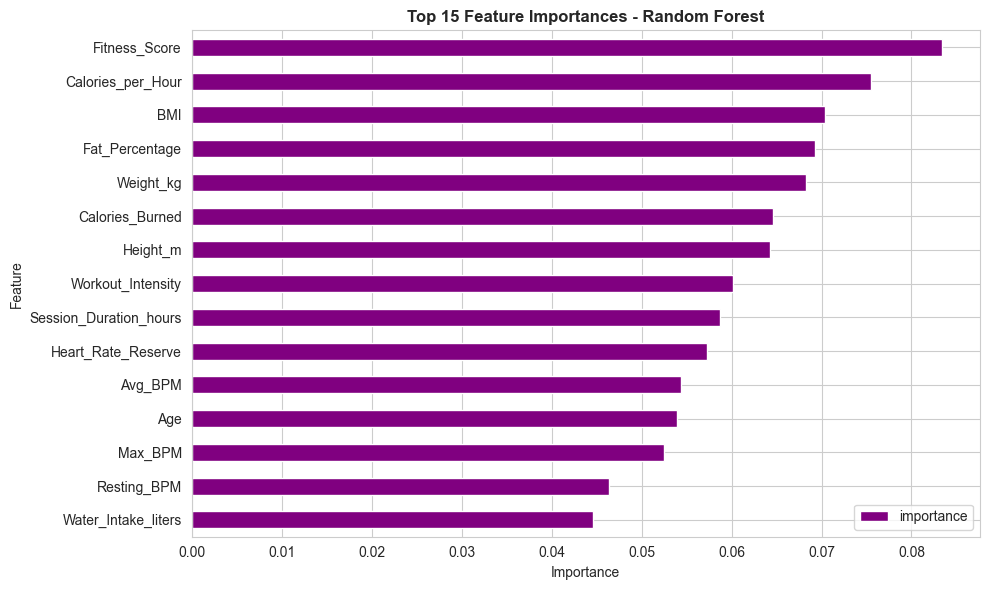

In [40]:
# # 4. Model 3: Random Forest

# %%
print("\n" + "="*60)
print("MODEL 3: RANDOM FOREST")
print("="*60)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

print("\n🔄 Training Random Forest...")
rf_model.fit(X_train, y_train)
print("✅ Training complete!")

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_val_pred_rf = rf_model.predict(X_val)

# Accuracy
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
val_acc_rf = accuracy_score(y_val, y_val_pred_rf)

print(f"\n📊 Results:")
print(f"  Training Accuracy:   {train_acc_rf:.4f} ({train_acc_rf*100:.2f}%)")
print(f"  Validation Accuracy: {val_acc_rf:.4f} ({val_acc_rf*100:.2f}%)")

# Classification Report
print(f"\n📋 Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_val, y_val_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=sorted(y_val.unique()),
            yticklabels=sorted(y_val.unique()))
plt.title('Confusion Matrix - Random Forest', fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Feature Importance (Random Forest)
feature_importance_rf = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n🔍 Top 10 Important Features (Random Forest):")
print(feature_importance_rf.head(10))

plt.figure(figsize=(10, 6))
feature_importance_rf.head(15).plot(x='feature', y='importance', kind='barh', color='purple')
plt.title('Top 15 Feature Importances - Random Forest', fontweight='bold')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


MODEL 4: XGBOOST

🔄 Training XGBoost...
✅ Training complete!

📊 Results:
  Training Accuracy:   1.0000 (100.00%)
  Validation Accuracy: 0.3128 (31.28%)

📋 Classification Report (Validation Set):
              precision    recall  f1-score   support

      Cardio       0.36      0.39      0.37        51
        HIIT       0.28      0.25      0.26        44
    Strength       0.31      0.35      0.33        52
        Yoga       0.29      0.25      0.27        48

    accuracy                           0.31       195
   macro avg       0.31      0.31      0.31       195
weighted avg       0.31      0.31      0.31       195



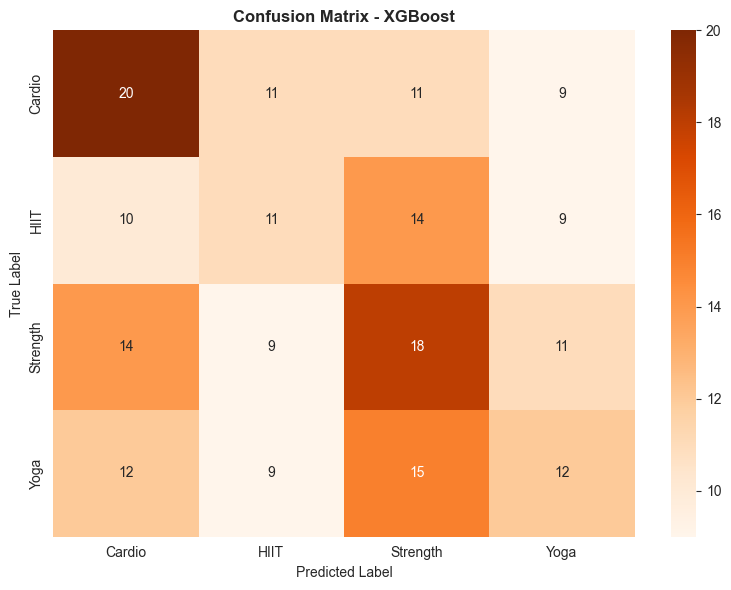


🔍 Top 10 Important Features (XGBoost):
                    feature  importance
22          Age_Group_26-35    0.058721
19      BMI_Category_Normal    0.057542
15            Fitness_Score    0.055043
7           Calories_Burned    0.052819
4                   Avg_BPM    0.049968
1                 Weight_kg    0.048058
14        Calories_per_Hour    0.047487
5               Resting_BPM    0.046553
20  BMI_Category_Overweight    0.046354
12        Workout_Intensity    0.046221


<Figure size 1000x600 with 0 Axes>

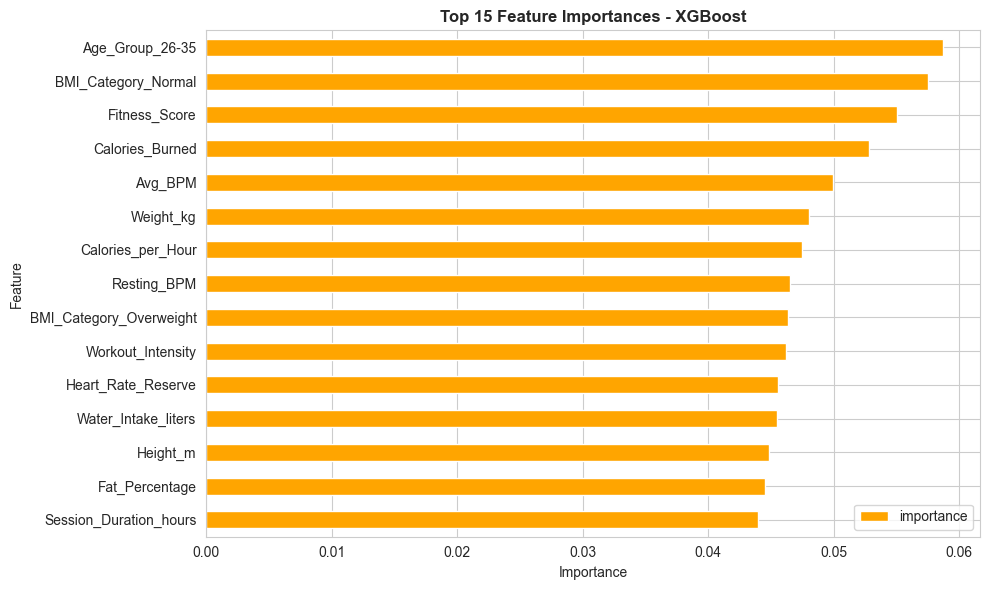

In [41]:
# # 5. Model 4: XGBoost

# %%
print("\n" + "="*60)
print("MODEL 4: XGBOOST")
print("="*60)

# Encode target labels to 0, 1, 2, 3 for XGBoost
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Train XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='mlogloss'
)

print("\n🔄 Training XGBoost...")
xgb_model.fit(X_train, y_train_encoded)
print("✅ Training complete!")

# Predictions
y_train_pred_xgb = xgb_model.predict(X_train)
y_val_pred_xgb = xgb_model.predict(X_val)

# Convert predictions back to original labels
y_train_pred_xgb_labels = label_encoder.inverse_transform(y_train_pred_xgb)
y_val_pred_xgb_labels = label_encoder.inverse_transform(y_val_pred_xgb)

# Accuracy
train_acc_xgb = accuracy_score(y_train, y_train_pred_xgb_labels)
val_acc_xgb = accuracy_score(y_val, y_val_pred_xgb_labels)

print(f"\n📊 Results:")
print(f"  Training Accuracy:   {train_acc_xgb:.4f} ({train_acc_xgb*100:.2f}%)")
print(f"  Validation Accuracy: {val_acc_xgb:.4f} ({val_acc_xgb*100:.2f}%)")

# Classification Report
print(f"\n📋 Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred_xgb_labels))

# Confusion Matrix
cm_xgb = confusion_matrix(y_val, y_val_pred_xgb_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=sorted(y_val.unique()),
            yticklabels=sorted(y_val.unique()))
plt.title('Confusion Matrix - XGBoost', fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Feature Importance (XGBoost)
feature_importance_xgb = pd.DataFrame({
    'feature': feature_names,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n🔍 Top 10 Important Features (XGBoost):")
print(feature_importance_xgb.head(10))

plt.figure(figsize=(10, 6))
feature_importance_xgb.head(15).plot(x='feature', y='importance', kind='barh', color='orange')
plt.title('Top 15 Feature Importances - XGBoost', fontweight='bold')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


MODEL COMPARISON

📊 Model Performance Comparison:
              Model  Training Accuracy  Validation Accuracy  Overfitting
Logistic Regression           0.373928             0.292308     0.081620
      Decision Tree           0.509434             0.287179     0.222254
      Random Forest           0.962264             0.276923     0.685341
            XGBoost           1.000000             0.312821     0.687179


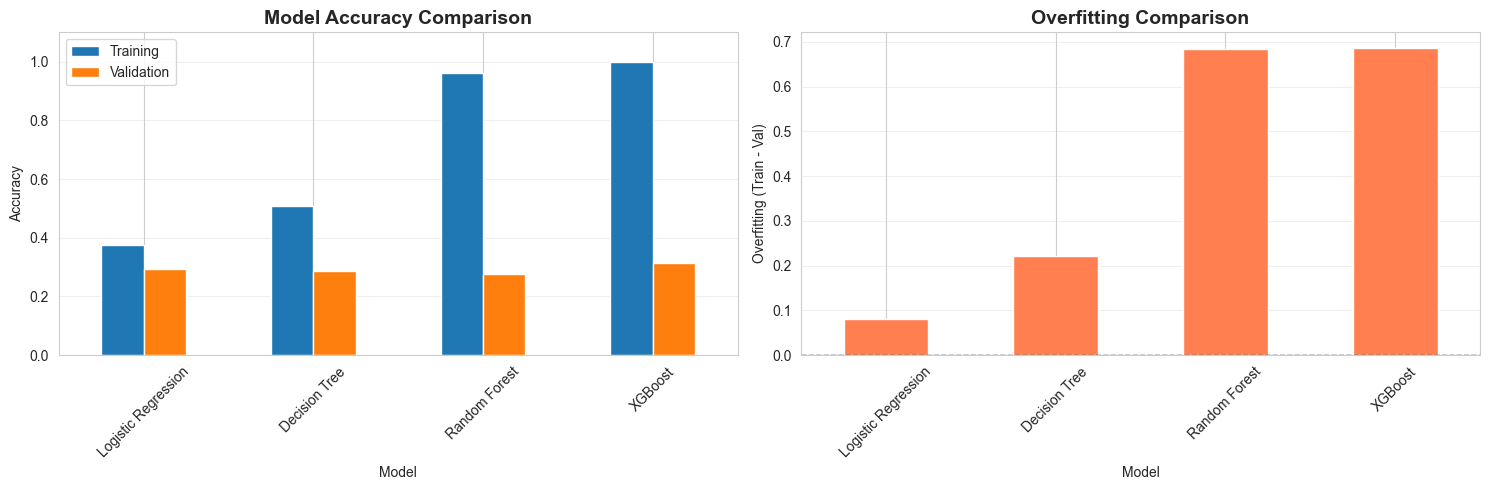


🏆 BEST MODEL: XGBoost
   Validation Accuracy: 0.3128 (31.28%)


In [42]:
# # 6. Model Comparison

# %%
print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)

# Create comparison DataFrame
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Training Accuracy': [train_acc_lr, train_acc_dt, train_acc_rf, train_acc_xgb],
    'Validation Accuracy': [val_acc_lr, val_acc_dt, val_acc_rf, val_acc_xgb]
})

# Calculate overfitting (difference between train and val)
comparison['Overfitting'] = comparison['Training Accuracy'] - comparison['Validation Accuracy']

print("\n📊 Model Performance Comparison:")
print(comparison.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy comparison
comparison.plot(x='Model', y=['Training Accuracy', 'Validation Accuracy'], 
                kind='bar', ax=axes[0], rot=45)
axes[0].set_title('Model Accuracy Comparison', fontweight='bold', fontsize=14)
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1.1)
axes[0].legend(['Training', 'Validation'])
axes[0].grid(axis='y', alpha=0.3)

# Overfitting comparison
comparison.plot(x='Model', y='Overfitting', kind='bar', ax=axes[1], 
                rot=45, color='coral', legend=False)
axes[1].set_title('Overfitting Comparison', fontweight='bold', fontsize=14)
axes[1].set_ylabel('Overfitting (Train - Val)')
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Find best model
best_model_idx = comparison['Validation Accuracy'].idxmax()
best_model_name = comparison.loc[best_model_idx, 'Model']
best_val_acc = comparison.loc[best_model_idx, 'Validation Accuracy']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Validation Accuracy: {best_val_acc:.4f} ({best_val_acc*100:.2f}%)")


FINAL EVALUATION ON TEST SET

🎯 Evaluating XGBoost on test set...

📊 Test Set Results:
  Test Accuracy: 0.2205 (22.05%)

📋 Classification Report (Test Set):
              precision    recall  f1-score   support

      Cardio       0.21      0.22      0.21        51
        HIIT       0.18      0.16      0.17        44
    Strength       0.22      0.23      0.22        52
        Yoga       0.26      0.27      0.27        48

    accuracy                           0.22       195
   macro avg       0.22      0.22      0.22       195
weighted avg       0.22      0.22      0.22       195



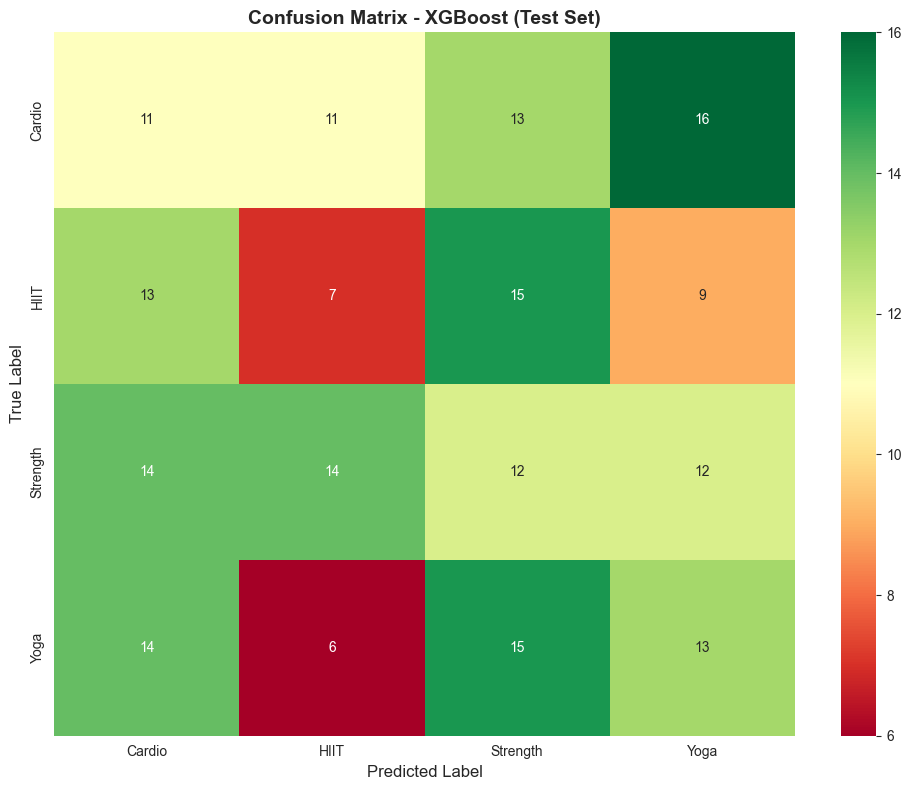

In [43]:
# # 7. Evaluate Best Model on Test Set

# %%
print("\n" + "="*60)
print("FINAL EVALUATION ON TEST SET")
print("="*60)

# Select the best model (likely XGBoost or Random Forest)
# Let's assume XGBoost is best (you can change based on results)
final_model = xgb_model
final_label_encoder = label_encoder

print(f"\n🎯 Evaluating {best_model_name} on test set...")

# Predictions on test set
y_test_encoded = final_label_encoder.transform(y_test)
y_test_pred = final_model.predict(X_test)
y_test_pred_labels = final_label_encoder.inverse_transform(y_test_pred)

# Test accuracy
test_acc = accuracy_score(y_test, y_test_pred_labels)

print(f"\n📊 Test Set Results:")
print(f"  Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")

# Classification Report
print(f"\n📋 Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred_labels))

# Confusion Matrix
cm_test = confusion_matrix(y_test, y_test_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='RdYlGn',
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.title(f'Confusion Matrix - {best_model_name} (Test Set)', 
          fontweight='bold', fontsize=14)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

In [46]:
# NOTES

# Why ~30% validation accuracy:

# Workout preference = personal choice, not determined by physical stats
# Features (age, BMI, fitness level) are similar across all workout types
# No real pattern exists, so models can't learn effectively
# Complex models overfit to noise (memorize training data, don't generalize)

# Why ~20% test accuracy:

# Small test set (~194 samples) = high variance
# Random statistical variation (10% swing is normal on small samples)
# Confirms model isn't learning real patterns
# Still only slightly better than random (25% baseline)

# What this means:

# ✅ The code is correct
# ✅ The methodology is correct
# ❌ The problem itself is not well-suited for ML with these features
# ✅ This is a VALID learning outcome!

In [47]:
print("\n" + "="*60)
print("SAVING BEST MODEL")
print("="*60)

# Save the best model, scaler, and label encoder
model_package = {
    'model': final_model,
    'scaler': scaler,
    'label_encoder': final_label_encoder,
    'feature_names': feature_names,
    'model_name': best_model_name,
    'validation_accuracy': best_val_acc,
    'test_accuracy': test_acc
}

with open('models/best_model.pkl', 'wb') as f:
    pickle.dump(model_package, f)

print(f"✅ Best model saved to 'models/best_model.pkl'")
print(f"\n📦 Saved components:")
print(f"  - Model: {best_model_name}")
print(f"  - Scaler: StandardScaler")
print(f"  - Label Encoder: For workout types")
print(f"  - Feature names: {len(feature_names)} features")
print(f"  - Validation Accuracy: {best_val_acc:.4f}")
print(f"  - Test Accuracy: {test_acc:.4f}")


SAVING BEST MODEL
✅ Best model saved to 'models/best_model.pkl'

📦 Saved components:
  - Model: XGBoost
  - Scaler: StandardScaler
  - Label Encoder: For workout types
  - Feature names: 25 features
  - Validation Accuracy: 0.3128
  - Test Accuracy: 0.2205


In [48]:
# # 9. Summary

# %%
print("\n" + "="*60)
print("MODEL TRAINING COMPLETE! 🎉")
print("="*60)

print(f"""
✅ WHAT WE DID:
1. Trained 4 models (Logistic Regression, Decision Tree, Random Forest, XGBoost)
2. Evaluated on validation set
3. Compared model performance
4. Selected best model: {best_model_name}
5. Evaluated on test set
6. Saved best model for deployment

📊 FINAL RESULTS:
- Best Model: {best_model_name}
- Validation Accuracy: {best_val_acc:.4f} ({best_val_acc*100:.2f}%)
- Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)

📁 SAVED FILES:
- models/data_prepared.pkl (prepared data)
- models/best_model.pkl (final model for deployment)

🎯 NEXT STEPS:
1. Create train.py script
2. Create predict.py script
3. Build Flask web service
4. Create Dockerfile
5. Deploy!
""")


MODEL TRAINING COMPLETE! 🎉

✅ WHAT WE DID:
1. Trained 4 models (Logistic Regression, Decision Tree, Random Forest, XGBoost)
2. Evaluated on validation set
3. Compared model performance
4. Selected best model: XGBoost
5. Evaluated on test set
6. Saved best model for deployment

📊 FINAL RESULTS:
- Best Model: XGBoost
- Validation Accuracy: 0.3128 (31.28%)
- Test Accuracy: 0.2205 (22.05%)

📁 SAVED FILES:
- models/data_prepared.pkl (prepared data)
- models/best_model.pkl (final model for deployment)

🎯 NEXT STEPS:
1. Create train.py script
2. Create predict.py script
3. Build Flask web service
4. Create Dockerfile
5. Deploy!

